In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import math  # This library is to use normal math functions like exp,sin etc.

In [3]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Q1

## Loading data

In [ ]:
#below where the file is in gdrive, change with your
data_path = "/content/drive/MyDrive/Prnn/"
train_dataset = np.loadtxt(data_path + 'p1_train.csv', delimiter=',')
test_dataset = np.loadtxt(data_path + 'p1_test.csv', delimiter=',')

In [ ]:
features = train_dataset.shape[1]-1 #2

In [ ]:
X_train = train_dataset[:,0:features]
Y_train = train_dataset[:,features]
Y_train = Y_train.reshape(Y_train.shape[0],1)

In [ ]:
X_test = test_dataset[:,0:features]
Y_test = test_dataset[:,features]
Y_test = Y_test.reshape(Y_test.shape[0],1)

## Training

In [ ]:
Y_train_1 = Y_train
X_train_1 = X_train

In [ ]:
# Creating augmented data matrix
tmp = np.ones((X_train_1.shape[0],1))
X_train_1=np.column_stack((X_train_1,tmp))
X_train_1.shape

(10000, 3)

In [ ]:
# Creating augmented data matrix
tmp = np.ones((X_test_1.shape[0],1))
X_test_1=np.column_stack((X_test_1,tmp))
X_test_1.shape

(5000, 19)

In [ ]:
W = (np.linalg.inv(X_train_1.T@X_train_1))@X_train_1.T@Y_train_1

In [ ]:
W.shape

(3, 1)

In [ ]:
#MSE on train dataset
loss =(np.linalg.norm(X_train_1@W-Y_train_1))**2
MSE = loss/X_train.shape[0]
print('The Mean squared error loss is: ',MSE)

The Mean squared error loss is:  5.059684615643717


In [ ]:
Y_pred = X_train_1@W #Y predicted

In [ ]:
loss = 0
for i in range(X_train_1.shape[0]):
  tmp = X_train_1[i,:]
  tmp = tmp.reshape((tmp.shape[0],1))
  tmp=tmp.T
  loss = loss + abs(tmp@W-Y_train_1[i][0])
MAE = loss/X_train_1.shape[0]
print('Mean Absolute error is:',MAE)

Mean Absolute error is: [[1.79175321]]


In [ ]:
from scipy import stats  #only for finding p-value
t,p_val = stats.ttest_ind(Y_pred,Y_train_1)

In [ ]:
print('The P-value is:',p_val[0])

The P-value is: 0.9999999999999991


## Testing

In [ ]:
Y_test_1 = Y_test
X_test_1 = X_test

In [ ]:
# Creating augmented data matrix
tmp = np.ones((X_test_1.shape[0],1))
X_test_1=np.column_stack((X_test_1,tmp))
X_test_1.shape

(5000, 3)

In [ ]:
#MSE on test dataset
loss =(np.linalg.norm(X_test_1@W-Y_test_1))**2
MSE = loss/X_test.shape[0]
print('The Mean squared error loss is: ',MSE)

The Mean squared error loss is:  5.046436003951254


In [ ]:
loss = 0
for i in range(X_test_1.shape[0]):
  tmp = X_test_1[i,:]
  tmp = tmp.reshape((tmp.shape[0],1))
  tmp=tmp.T
  loss = loss + abs(tmp@W-Y_test_1[i][0])
MAE = loss/X_train_1.shape[0]
print('Mean Absolute error is:',MAE)

Mean Absolute error is: [[0.89954003]]


In [ ]:
Y_pred = X_test_1@W #Y predicted

In [ ]:
from scipy import stats
t,p_val = stats.ttest_ind(Y_pred,Y_test_1)

In [ ]:
print('The P-value is:',p_val[0])

The P-value is: 0.9084780712932874


# Q2

## Importing data

In [ ]:
#below where the file is in gdrive, change with your
data_path = "/content/drive/MyDrive/Prnn/"
train_dataset = np.loadtxt(data_path + 'p2_train.csv', delimiter=',')
test_dataset = np.loadtxt(data_path + 'p2_test.csv', delimiter=',')

In [ ]:
features = train_dataset.shape[1]-1 #2

In [ ]:
X_train = train_dataset[:,0:features]
Y_train = train_dataset[:,features]
Y_train = Y_train.reshape(Y_train.shape[0],1)

In [ ]:
X_test = test_dataset[:,0:features]
Y_test = test_dataset[:,features]
Y_test = Y_test.reshape(Y_test.shape[0],1)

## (i) Polynomial Function

In [ ]:
Y_train_1 = Y_train
X_train_1 = X_train

In [ ]:
Y_train_1 =100* Y_train_1/Y_train_1.max() # Normalizing Y labels

In [ ]:
X_train_1 = np.power(X_train[:,0],2)     # X0^2
X_train_1 = X_train_1.reshape((X_train_1.shape[0],1))

tmp = X_train[:,1]           # X1^2
tmp = np.power(tmp,2)
tmp = tmp
X_train_1=np.column_stack((X_train_1,tmp))

tmp = X_train[:,2]           # X2^2
tmp = np.power(tmp,2)
tmp = tmp
X_train_1=np.column_stack((X_train_1,tmp))

tmp = X_train[:,0]           # X0
tmp = np.power(tmp,1)
tmp = tmp
X_train_1=np.column_stack((X_train_1,tmp))

tmp = X_train[:,1]           # X1
tmp = np.power(tmp,1)
tmp = tmp
X_train_1=np.column_stack((X_train_1,tmp))


tmp = X_train[:,2]           # X2
tmp = np.power(tmp,1)
tmp = tmp
X_train_1=np.column_stack((X_train_1,tmp))

tmp = np.multiply(X_train[:,0],X_train[:,1])           # X0*X1
X_train_1=np.column_stack((X_train_1,tmp))

tmp = np.multiply(X_train[:,1],X_train[:,2])           # X1*X2
X_train_1=np.column_stack((X_train_1,tmp))

tmp = np.multiply(X_train[:,2],X_train[:,0])           # X2*X0
X_train_1=np.column_stack((X_train_1,tmp))

tmp = np.multiply(X_train[:,0],X_train[:,1])           # X0*X1*X2
tmp = np.multiply(X_train[:,2],tmp)
X_train_1=np.column_stack((X_train_1,tmp))

In [ ]:
X_train_1.shape

(10000, 10)

In [ ]:
# Creating augmented data matrix
tmp = np.ones((X_train_1.shape[0],1))
X_train_1=np.column_stack((X_train_1,tmp))
X_train_1.shape

(10000, 11)

### Training

In [ ]:
W = (np.linalg.inv(X_train_1.T@X_train_1))@X_train_1.T@Y_train_1 # Optimal point

In [ ]:
#MSE on train dataset
loss =(np.linalg.norm(X_train_1@W-Y_train_1))**2
MSE = loss/X_train.shape[0]
print('The Mean squared error loss is: ',MSE)

The Mean squared error loss is:  30.04779438717615


In [ ]:
loss = 0
for i in range(X_train_1.shape[0]):
  tmp = X_train_1[i,:]
  tmp = tmp.reshape((tmp.shape[0],1))
  tmp=tmp.T
  loss = loss + abs(tmp@W-Y_train_1[i][0])
MAE = loss/X_train_1.shape[0]
print('Mean Absolute error is:',MAE)

Mean Absolute error is: [[4.14377048]]


In [ ]:
Y_pred = X_train_1@W #Y predicted

In [ ]:
from scipy import stats
t,p_val = stats.ttest_ind(Y_pred,Y_train_1)

In [ ]:
print('The P-value is:',p_val[0])

The P-value is: 0.9999999999999908


### Testing

In [ ]:
Y_test_1 = Y_test
X_test_1 = X_test

In [ ]:
Y_test_1 = 100 * Y_test_1/Y_test_1.max() # Normalizing Y labels

In [ ]:
X_test_1 = np.power(X_test[:,0],2)
X_test_1 = X_test_1.reshape((X_test_1.shape[0],1))

tmp = X_test[:,1]           # We know there are three columns
tmp = np.power(tmp,2)
tmp = tmp
X_test_1=np.column_stack((X_test_1,tmp))

tmp = X_test[:,2]           # We know there are three columns
tmp = np.power(tmp,2)
tmp = tmp
X_test_1=np.column_stack((X_test_1,tmp))

tmp = X_test[:,0]           # We know there are three columns
tmp = np.power(tmp,1)
tmp = tmp
X_test_1=np.column_stack((X_test_1,tmp))

tmp = X_test[:,1]           # We know there are three columns
tmp = np.power(tmp,1)
tmp = tmp
X_test_1=np.column_stack((X_test_1,tmp))

tmp = X_test[:,2]           # We know there are three columns
tmp = np.power(tmp,1)
tmp = tmp
X_test_1=np.column_stack((X_test_1,tmp))

tmp = np.multiply(X_test[:,0],X_test[:,1])           # We know there are three columns
X_test_1=np.column_stack((X_test_1,tmp))

tmp = np.multiply(X_test[:,1],X_test[:,2])           # We know there are three columns
X_test_1=np.column_stack((X_test_1,tmp))

tmp = np.multiply(X_test[:,2],X_test[:,0])           # We know there are three columns
X_test_1=np.column_stack((X_test_1,tmp))

tmp = np.multiply(X_test[:,0],X_test[:,1])           # We know there are three columns
tmp = np.multiply(X_test[:,2],tmp)
X_test_1=np.column_stack((X_test_1,tmp))


In [ ]:
# Creating augmented data matrix
tmp = np.ones((X_test_1.shape[0],1))
X_test_1=np.column_stack((X_test_1,tmp))
X_test_1.shape

(5000, 11)

In [ ]:
#MSE on train dataset
loss =(np.linalg.norm(X_test_1@W-Y_test_1))**2
MSE = loss/X_test.shape[0]
print('The Mean squared error loss is: ',MSE)

The Mean squared error loss is:  33.192819326441374


In [ ]:
loss = 0
for i in range(X_test_1.shape[0]):
  tmp = X_test_1[i,:]
  tmp = tmp.reshape((tmp.shape[0],1))
  tmp=tmp.T
  loss = loss + abs(tmp@W-Y_test_1[i][0])
MAE = loss/X_test_1.shape[0]
print('Mean Absolute error is:',MAE)

Mean Absolute error is: [[4.2934914]]


In [ ]:
Y_pred = X_test_1@W #Y predicted

In [ ]:
from scipy import stats
t,p_val = stats.ttest_ind(Y_pred,Y_test_1)

In [ ]:
print('The P-value is:',p_val[0])

The P-value is: 0.6194277413529656


## (ii) exponential Function

In [ ]:
Y_train_1 = Y_train
X_train_1 = X_train

In [ ]:
Y_train_1 =100* Y_train_1/Y_train_1.max() # Normalizing Y labels

In [ ]:
X_train_1 = np.power(X_train[:,0],2)     # X0^2
X_train_1 = X_train_1.reshape((X_train_1.shape[0],1))

tmp = X_train[:,1]           # X1^2
tmp = np.power(tmp,2)
tmp = tmp
X_train_1=np.column_stack((X_train_1,tmp))

tmp = X_train[:,2]           # X2^2
tmp = np.power(tmp,2)
tmp = tmp
X_train_1=np.column_stack((X_train_1,tmp))

tmp = X_train[:,0]           # X0
tmp = np.power(tmp,1)
tmp = tmp
X_train_1=np.column_stack((X_train_1,tmp))

tmp = X_train[:,1]           # X1
tmp = np.power(tmp,1)
tmp = tmp
X_train_1=np.column_stack((X_train_1,tmp))


tmp = X_train[:,2]           # X2
tmp = np.power(tmp,1)
tmp = tmp
X_train_1=np.column_stack((X_train_1,tmp))

tmp = np.multiply(X_train[:,0],X_train[:,1])           # X0*X1
X_train_1=np.column_stack((X_train_1,tmp))

tmp = np.multiply(X_train[:,1],X_train[:,2])           # X1*X2
X_train_1=np.column_stack((X_train_1,tmp))

tmp = np.multiply(X_train[:,2],X_train[:,0])           # X2*X0
X_train_1=np.column_stack((X_train_1,tmp))

tmp = np.multiply(X_train[:,0],X_train[:,1])           # X0*X1*X2
tmp = np.multiply(X_train[:,2],tmp)
X_train_1=np.column_stack((X_train_1,tmp))

tmp = X_train[:,0]           # e^X0
tmp = np.exp(tmp)
tmp = tmp
X_train_1=np.column_stack((X_train_1,tmp))

tmp = X_train[:,1]           # e^X1
tmp = np.exp(tmp)
tmp = tmp
X_train_1=np.column_stack((X_train_1,tmp))

tmp = X_train[:,2]           # e^X2
tmp = np.exp(tmp)
tmp = tmp
X_train_1=np.column_stack((X_train_1,tmp))

In [ ]:
X_train_1.shape

(10000, 13)

In [ ]:
# Creating augmented data matrix
tmp = np.ones((X_train_1.shape[0],1))
X_train_1=np.column_stack((X_train_1,tmp))
X_train_1.shape

(10000, 14)

### Training

In [ ]:
W = (np.linalg.inv(X_train_1.T@X_train_1))@X_train_1.T@Y_train_1 # Optimal point

In [ ]:
#MSE on train dataset
loss =(np.linalg.norm(X_train_1@W-Y_train_1))**2
MSE = loss/X_train.shape[0]
print('The Mean squared error loss is: ',MSE)

The Mean squared error loss is:  19.211556652698473


In [ ]:
loss = 0
for i in range(X_train_1.shape[0]):
  tmp = X_train_1[i,:]
  tmp = tmp.reshape((tmp.shape[0],1))
  tmp=tmp.T
  loss = loss + abs(tmp@W-Y_train_1[i][0])
MAE = loss/X_train_1.shape[0]
print('Mean Absolute error is:',MAE)

Mean Absolute error is: [[3.12863929]]


In [ ]:
Y_pred = X_train_1@W #Y predicted

In [ ]:
from scipy import stats
t,p_val = stats.ttest_ind(Y_pred,Y_train_1)

In [ ]:
print('The P-value is:',p_val[0])

The P-value is: 0.9999999999999278


### Testing

In [ ]:
Y_test_1 = Y_test
X_test_1 = X_test

In [ ]:
Y_test_1 = 100 * Y_test_1/Y_test_1.max() # Normalizing Y labels

In [ ]:
X_test_1 = np.power(X_test[:,0],2)
X_test_1 = X_test_1.reshape((X_test_1.shape[0],1))

tmp = X_test[:,1]           # We know there are three columns
tmp = np.power(tmp,2)
tmp = tmp
X_test_1=np.column_stack((X_test_1,tmp))

tmp = X_test[:,2]           # We know there are three columns
tmp = np.power(tmp,2)
tmp = tmp
X_test_1=np.column_stack((X_test_1,tmp))

tmp = X_test[:,0]           # We know there are three columns
tmp = np.power(tmp,1)
tmp = tmp
X_test_1=np.column_stack((X_test_1,tmp))

tmp = X_test[:,1]           # We know there are three columns
tmp = np.power(tmp,1)
tmp = tmp
X_test_1=np.column_stack((X_test_1,tmp))

tmp = X_test[:,2]           # We know there are three columns
tmp = np.power(tmp,1)
tmp = tmp
X_test_1=np.column_stack((X_test_1,tmp))

tmp = np.multiply(X_test[:,0],X_test[:,1])           # We know there are three columns
X_test_1=np.column_stack((X_test_1,tmp))

tmp = np.multiply(X_test[:,1],X_test[:,2])           # We know there are three columns
X_test_1=np.column_stack((X_test_1,tmp))

tmp = np.multiply(X_test[:,2],X_test[:,0])           # We know there are three columns
X_test_1=np.column_stack((X_test_1,tmp))

tmp = np.multiply(X_test[:,0],X_test[:,1])           # We know there are three columns
tmp = np.multiply(X_test[:,2],tmp)
X_test_1=np.column_stack((X_test_1,tmp))

tmp = X_test[:,0]           # e^X0
tmp = np.exp(tmp)
tmp = tmp
X_test_1=np.column_stack((X_test_1,tmp))

tmp = X_test[:,1]           # e^X1
tmp = np.exp(tmp)
tmp = tmp
X_test_1=np.column_stack((X_test_1,tmp))

tmp = X_test[:,2]           # e^X2
tmp = np.exp(tmp)
tmp = tmp
X_test_1=np.column_stack((X_test_1,tmp))


In [ ]:
# Creating augmented data matrix
tmp = np.ones((X_test_1.shape[0],1))
X_test_1=np.column_stack((X_test_1,tmp))
X_test_1.shape

(5000, 14)

In [ ]:
#MSE on train dataset
loss =(np.linalg.norm(X_test_1@W-Y_test_1))**2
MSE = loss/X_test.shape[0]
print('The Mean squared error loss is: ',MSE)

The Mean squared error loss is:  21.463496330688425


In [ ]:
loss = 0
for i in range(X_test_1.shape[0]):
  tmp = X_test_1[i,:]
  tmp = tmp.reshape((tmp.shape[0],1))
  tmp=tmp.T
  loss = loss + abs(tmp@W-Y_test_1[i][0])
MAE = loss/X_test_1.shape[0]
print('Mean Absolute error is:',MAE)

Mean Absolute error is: [[3.29764013]]


In [ ]:
Y_pred = X_test_1@W #Y predicted

In [ ]:
from scipy import stats
t,p_val = stats.ttest_ind(Y_pred,Y_test_1)

In [ ]:
print('The P-value is:',p_val[0])

The P-value is: 0.47527565957850704


## (iii) sin and cos Function

In [ ]:
Y_train_1 = Y_train
X_train_1 = X_train

In [ ]:
Y_train_1 =100* Y_train_1/Y_train_1.max() # Normalizing Y labels

In [ ]:
X_train_1 = np.power(X_train[:,0],2)     # X0^2
X_train_1 = X_train_1.reshape((X_train_1.shape[0],1))

tmp = X_train[:,1]           # X1^2
tmp = np.power(tmp,2)
tmp = tmp
X_train_1=np.column_stack((X_train_1,tmp))

tmp = X_train[:,2]           # X2^2
tmp = np.power(tmp,2)
tmp = tmp
X_train_1=np.column_stack((X_train_1,tmp))

tmp = X_train[:,0]           # X0
tmp = np.power(tmp,1)
tmp = tmp
X_train_1=np.column_stack((X_train_1,tmp))

tmp = X_train[:,1]           # X1
tmp = np.power(tmp,1)
tmp = tmp
X_train_1=np.column_stack((X_train_1,tmp))


tmp = X_train[:,2]           # X2
tmp = np.power(tmp,1)
tmp = tmp
X_train_1=np.column_stack((X_train_1,tmp))

tmp = np.multiply(X_train[:,0],X_train[:,1])           # X0*X1
X_train_1=np.column_stack((X_train_1,tmp))

tmp = np.multiply(X_train[:,1],X_train[:,2])           # X1*X2
X_train_1=np.column_stack((X_train_1,tmp))

tmp = np.multiply(X_train[:,2],X_train[:,0])           # X2*X0
X_train_1=np.column_stack((X_train_1,tmp))

tmp = np.multiply(X_train[:,0],X_train[:,1])           # X0*X1*X2
tmp = np.multiply(X_train[:,2],tmp)
X_train_1=np.column_stack((X_train_1,tmp))

tmp = X_train[:,0]           # sin X0
tmp = np.sin(tmp)
tmp = tmp
X_train_1=np.column_stack((X_train_1,tmp))

tmp = X_train[:,1]           # sin X1
tmp = np.sin(tmp)
tmp = tmp
X_train_1=np.column_stack((X_train_1,tmp))

tmp = X_train[:,2]           # sin X2
tmp = np.sin(tmp)
tmp = tmp
X_train_1=np.column_stack((X_train_1,tmp))

tmp = X_train[:,0]           # cos X0
tmp = np.cos(tmp)
tmp = tmp
X_train_1=np.column_stack((X_train_1,tmp))

tmp = X_train[:,1]           # cos X1
tmp = np.cos(tmp)
tmp = tmp
X_train_1=np.column_stack((X_train_1,tmp))

tmp = X_train[:,2]           # cos X2
tmp = np.cos(tmp)
tmp = tmp
X_train_1=np.column_stack((X_train_1,tmp))

In [ ]:
X_train_1.shape

(10000, 16)

In [ ]:
# Creating augmented data matrix
tmp = np.ones((X_train_1.shape[0],1))
X_train_1=np.column_stack((X_train_1,tmp))
X_train_1.shape

(10000, 17)

### Training

In [ ]:
W = (np.linalg.inv(X_train_1.T@X_train_1))@X_train_1.T@Y_train_1 # Optimal point

In [ ]:
#MSE on train dataset
loss =(np.linalg.norm(X_train_1@W-Y_train_1))**2
MSE = loss/X_train.shape[0]
print('The Mean squared error loss is: ',MSE)

The Mean squared error loss is:  25.900470686479018


In [ ]:
loss = 0
for i in range(X_train_1.shape[0]):
  tmp = X_train_1[i,:]
  tmp = tmp.reshape((tmp.shape[0],1))
  tmp=tmp.T
  loss = loss + abs(tmp@W-Y_train_1[i][0])
MAE = loss/X_train_1.shape[0]
print('Mean Absolute error is:',MAE)

Mean Absolute error is: [[3.73736182]]


In [ ]:
Y_pred = X_train_1@W #Y predicted

In [ ]:
from scipy import stats
t,p_val = stats.ttest_ind(Y_pred,Y_train_1)

In [ ]:
print('The P-value is:',p_val[0])

The P-value is: 0.9999999999999818


### Testing

In [ ]:
Y_test_1 = Y_test
X_test_1 = X_test

In [ ]:
Y_test_1 = 100 * Y_test_1/Y_test_1.max() # Normalizing Y labels

In [ ]:
X_test_1 = np.power(X_test[:,0],2)
X_test_1 = X_test_1.reshape((X_test_1.shape[0],1))

tmp = X_test[:,1]           # We know there are three columns
tmp = np.power(tmp,2)
tmp = tmp
X_test_1=np.column_stack((X_test_1,tmp))

tmp = X_test[:,2]           # We know there are three columns
tmp = np.power(tmp,2)
tmp = tmp
X_test_1=np.column_stack((X_test_1,tmp))

tmp = X_test[:,0]           # We know there are three columns
tmp = np.power(tmp,1)
tmp = tmp
X_test_1=np.column_stack((X_test_1,tmp))

tmp = X_test[:,1]           # We know there are three columns
tmp = np.power(tmp,1)
tmp = tmp
X_test_1=np.column_stack((X_test_1,tmp))

tmp = X_test[:,2]           # We know there are three columns
tmp = np.power(tmp,1)
tmp = tmp
X_test_1=np.column_stack((X_test_1,tmp))

tmp = np.multiply(X_test[:,0],X_test[:,1])           # We know there are three columns
X_test_1=np.column_stack((X_test_1,tmp))

tmp = np.multiply(X_test[:,1],X_test[:,2])           # We know there are three columns
X_test_1=np.column_stack((X_test_1,tmp))

tmp = np.multiply(X_test[:,2],X_test[:,0])           # We know there are three columns
X_test_1=np.column_stack((X_test_1,tmp))

tmp = np.multiply(X_test[:,0],X_test[:,1])           # We know there are three columns
tmp = np.multiply(X_test[:,2],tmp)
X_test_1=np.column_stack((X_test_1,tmp))

tmp = X_test[:,0]           # e^X0
tmp = np.sin(tmp)
tmp = tmp
X_test_1=np.column_stack((X_test_1,tmp))

tmp = X_test[:,1]           # sin X1
tmp = np.sin(tmp)
tmp = tmp
X_test_1=np.column_stack((X_test_1,tmp))

tmp = X_test[:,2]           # sin X2
tmp = np.sin(tmp)
tmp = tmp
X_test_1=np.column_stack((X_test_1,tmp))

tmp = X_test[:,0]           # cos X0
tmp = np.cos(tmp)
tmp = tmp
X_test_1=np.column_stack((X_test_1,tmp))

tmp = X_test[:,1]           # cos X1
tmp = np.cos(tmp)
tmp = tmp
X_test_1=np.column_stack((X_test_1,tmp))

tmp = X_test[:,2]           # cos X2
tmp = np.cos(tmp)
tmp = tmp
X_test_1=np.column_stack((X_test_1,tmp))

In [ ]:
# Creating augmented data matrix
tmp = np.ones((X_test_1.shape[0],1))
X_test_1=np.column_stack((X_test_1,tmp))
X_test_1.shape

(5000, 17)

In [ ]:
#MSE on train dataset
loss =(np.linalg.norm(X_test_1@W-Y_test_1))**2
MSE = loss/X_test.shape[0]
print('The Mean squared error loss is: ',MSE)

The Mean squared error loss is:  28.56399813215441


In [ ]:
loss = 0
for i in range(X_test_1.shape[0]):
  tmp = X_test_1[i,:]
  tmp = tmp.reshape((tmp.shape[0],1))
  tmp=tmp.T
  loss = loss + abs(tmp@W-Y_test_1[i][0])
MAE = loss/X_test_1.shape[0]
print('Mean Absolute error is:',MAE)

Mean Absolute error is: [[3.86481134]]


In [ ]:
Y_pred = X_test_1@W #Y predicted

In [ ]:
from scipy import stats
t,p_val = stats.ttest_ind(Y_pred,Y_test_1)

In [ ]:
print('The P-value is:',p_val[0])

The P-value is: 0.5405053020975641


# Q3

## Importing dataset

In [4]:
#below where the file is in gdrive, change with your
data_path = "/content/drive/MyDrive/Prnn/"
train_dataset = np.loadtxt(data_path + 'p3_train.csv', delimiter=',')
test_dataset = np.loadtxt(data_path + 'p3_test.csv', delimiter=',')

In [5]:
# Creating base training and testing dataset
X_train_base = train_dataset[:,:10]
Y_train_base = train_dataset[:,10]
X_test_base = test_dataset[:,:10]
Y_test_base = test_dataset[:,10]

## (i) Bayes Classifier

In [ ]:
classes = 5
features = 10

### Assuming class conditionals as Normal Density

Determining class conditional densities with variance

In [ ]:
# Creating list of numpy arrays containing training datas of each class with class as index of list 
temp = train_dataset[:,:]
lst = [] 
for i in range(1,classes+1):
  x = temp[np.where(temp[:,10]==i)]
  x = x[:,:10]      #features = 10
  lst.append(x)

In [ ]:
# Initialising training and testing datas to base datas for this part
Y_train = Y_train_base
Y_test = Y_test_base
X_train = X_train_base
X_test = X_test_base

In [ ]:
mean=[]   # 10 features' mean for each classes
for i in range(classes):
  a=lst[i]
  a = a.mean(axis=0)
  mean.append(a)

In [ ]:
variance=[]    # Updating Variance
for i in range(classes):
  a=lst[i]-mean[i]
  v = a.T@a/lst[i].shape[0]
  v = np.linalg.inv(v)
  variance.append(v)

In [ ]:
variance[1].shape

(10, 10)

In [ ]:
X_test.shape

(15000, 10)

#### Training

In [ ]:
count = 0
for i in range(X_train.shape[0]):
  g = []                   #  Storing class conditionals of 5 classes
  for j in range(classes):
    v = (X_train[i]-mean[j])
    v=v.reshape((v.shape[0],1))
    k=0.5*v.T@variance[j]@v
    k = math.sqrt(np.linalg.det(variance[j]))*math.exp(-k)
    g.append(k)          #comparing exponent values
    #print(g)
  k = g.index(max(g)) +1
  #print(g)
  if k==Y_train[i]:
    count=count+1

In [ ]:
print('Accuracy is:',count*100/60000,' percent')

Accuracy is: 59.391666666666666  percent


#### Testing

In [ ]:
conf_matrix = np.zeros((classes,classes))

In [ ]:
count = 0
for i in range(X_test.shape[0]):
  g = []                   #  Storing class conditionals of 5 classes
  for j in range(classes):
    v = (X_test[i]-mean[j])
    v=v.reshape((v.shape[0],1))
    k=0.5*v.T@variance[j]@v
    k = math.sqrt(np.linalg.det(variance[j]))*math.exp(-k)
    g.append(k) 
  k = g.index(max(g))         # comparing pre-exponent values
  if k==int(Y_test[i])-1:
    count=count+1
  v = int(Y_test[i])-1
  conf_matrix[v][k] += 1

In [ ]:
print('Testing Accuracy is:',count*100/15000,' percent')

Testing Accuracy is: 59.36  percent


In [ ]:
print('The confusion matrix for above testing data is:')
print(conf_matrix)

The confusion matrix for above testing data is:
[[1627.  362.  264.  344.  374.]
 [ 380. 1742.  278.  268.  313.]
 [ 297.  298. 1914.  240.  291.]
 [ 321.  335.  255. 1794.  270.]
 [ 363.  310.  231.  302. 1827.]]


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [ ]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.5460647759691223, 0.5779694757796947, 0.6399197592778335, 0.6057741009623502, 0.5982318271119843]


### Laplace Density

In [ ]:
# Initialising dataset for this part
X_train = np.absolute(train_dataset[:,:10])
Y_train = train_dataset[:,10]
X_test = np.absolute(test_dataset[:,:10])
Y_test = test_dataset[:,10]

In [ ]:
temp = train_dataset[:,:]
lst = []
for i in range(1,classes+1):
  x = temp[np.where(temp[:,10]==i)]
  x = x[:,:10]
  lst.append(x)

In [ ]:
# Finding Median
median=[]   # 10 features' exponential parameter for each classes
for i in range(classes):
  a=lst[i]
  a = np.median(a,axis=0)
  median.append(a)

In [ ]:
# Finding Sigma
sigma = []
for i in range(classes):
  s = np.zeros(10)  # 10 is size of features
  for j in range(lst[i].shape[0]):
    x=lst[i]
    s=s+np.absolute(x[j]-median[i])
  s=s/lst[i].shape[0]
  sigma.append(s)

#### Training

In [ ]:
count = 0
for i in range(X_train.shape[0]):
  g = []                   #  Storing class conditionals of 5 classes
  for j in range(classes):
    k=0
    s=1
    x = X_train[i]
    for l in range(10): # 10 is number of features
      k=k+abs(x[l]-median[j][l])/sigma[j][l]
      s = s*sigma[j][l]
    k = math.exp(-0.5*k)/s
    g.append(k)
  k = g.index(max(g)) +1
  if k==Y_train[i]:
    count=count+1

In [ ]:
print('Accuracy is:',count*100/X_train.shape[0],' percent')

Accuracy is: 48.79  percent


#### Testing

In [ ]:
conf_matrix = np.zeros((classes,classes))

In [ ]:
count = 0
for i in range(X_test.shape[0]):
  g = []                   #  Storing class conditionals of 5 classes
  for j in range(classes):
    k=0
    s=1
    x = X_test[i]
    for l in range(10): # 10 is number of features
      k=k+abs(x[l]-median[j][l])/sigma[j][l]
      s = s*sigma[j][l]
    k = math.exp(-0.5*k)/s
    g.append(k)
  k = g.index(max(g))
  if k==int(Y_test[i])-1:
    count=count+1
  v = int(Y_test[i])-1
  conf_matrix[v][k] += 1

In [ ]:
print('Accuracy is:',count*100/15000,' percent')

Accuracy is: 48.486666666666665  percent


In [ ]:
print('The confusion matrix for above testing data is:')
print(conf_matrix)

The confusion matrix for above testing data is:
[[1058.  505.  464.  429.  515.]
 [ 303. 1432.  428.  384.  434.]
 [ 250.  388. 1746.  287.  369.]
 [ 255.  438.  414. 1462.  406.]
 [ 270.  409.  409.  370. 1575.]]


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [ ]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.41433326806344234, 0.4654640013001788, 0.5371481310567605, 0.49500592517352293, 0.4974731522425774]


## (iii) Multi class logistic regressor

In [ ]:
# Initialising training and testing datas to base datas for this part
Y_train = Y_train_base
Y_test = Y_test_base
X_train = X_train_base
X_test = X_test_base

In [ ]:
# Run this only once
# Creating augmented train data by adding one extra dimension
tmp = np.ones((X_train.shape[0],1)) 
X_train=np.column_stack((X_train,tmp))
X_train.shape

(60000, 11)

In [ ]:
# Run this only once
# Creating augmented train data by adding one extra dimension
tmp = np.ones((X_test.shape[0],1))
X_test=np.column_stack((X_test,tmp))
X_test.shape

(15000, 11)

### Training

In [ ]:
classes = 5
features = 10 + 1 # augmented data

In [ ]:
W=[] # Weight vector for each class
for i in range(5):
  W.append(np.ones((features,1)))

In [ ]:
def calc_loss(X,W,j):
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for i in range(classes):
    e.append(math.exp(W[i].T@X))
  k = sum(e)
  for i in range(classes):
    g.append(e[i]/k)
  loss = -1*math.log(g[j])     # loss for 1 image
  for i in range(classes):
    if i!=j:
      grad.append(-g[i]*X.reshape(X.shape[0]))
    else:
      grad.append((1-g[i])*X.reshape(X.shape[0]))
  return loss,grad

In [ ]:
def train_epoch1():
  final_loss = 0
  final_grad = np.zeros((features,classes)) # no of features = length of weight vector 
  for i in range(X_train.shape[0]):
    loss,grad = calc_loss(X_train[i,:],W,int(Y_train[i])-1)    # classes start from 1 and not 0
    final_loss =final_loss + loss
    final_grad = final_grad + np.stack(grad,axis = 1)
  return final_loss,final_grad

In [ ]:
epochs = 25
alpha = 10
prev_loss = 0
for i in range(epochs):
  loss,grad = train_epoch1()
  for j in range(classes):
    gradient = grad[:,j].reshape(grad[:,j].shape[0],1)
    if prev_loss<loss:
      alpha = (alpha/10)
    W[j]=W[j]+alpha*gradient/np.linalg.norm(gradient)
    prev_loss = loss
  print('loss in',i,'epoch is',loss/X_train.shape[0])

loss in 0 epoch is 1.6094379124357612
loss in 1 epoch is 1.192551898914494
loss in 2 epoch is 1.5907546760361644
loss in 3 epoch is 1.468037652541224
loss in 4 epoch is 1.3648306696771892
loss in 5 epoch is 1.2822053050921147
loss in 6 epoch is 1.2202366748066622
loss in 7 epoch is 1.1778894619643792
loss in 8 epoch is 1.153237674950642
loss in 9 epoch is 1.143783210814199
loss in 10 epoch is 1.1453306965313477
loss in 11 epoch is 1.1446500301703146
loss in 12 epoch is 1.144099900449812
loss in 13 epoch is 1.1436730123126952
loss in 14 epoch is 1.1433628027976166
loss in 15 epoch is 1.1431635336420118
loss in 16 epoch is 1.1430690647015067
loss in 17 epoch is 1.1430671483702999
loss in 18 epoch is 1.1430825510760219
loss in 19 epoch is 1.1430735745017897
loss in 20 epoch is 1.1430663769901421
loss in 21 epoch is 1.1430609388661332
loss in 22 epoch is 1.1430572267535648
loss in 23 epoch is 1.143055172559283
loss in 24 epoch is 1.1430545690334197


In [ ]:
print('Empirical risk on training data is:')
print(loss/X_train.shape[0])  # 1/n factor

Empirical risk on training data is:
1.1430545690334197


### Testing

In [ ]:
conf_matrix = np.zeros((classes,classes))
count = 0
loss = 0
for i in range(X_test.shape[0]):
  X = X_test[i,:]
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for j in range(classes):
    e.append(math.exp(W[j].T@X))
  k = sum(e)
  for j in range(classes):
    g.append(e[j]/k)
  k = g.index(max(g))
  if k==int(Y_test[i])-1:  # Class starts from 1
    count = count+1
  v = int(Y_test[i])-1
  conf_matrix[v][k] += 1

  loss = loss - 1*math.log(g[v])

In [ ]:
print('The testing accuracy is:')
print(count*100/X_test.shape[0])

The testing accuracy is:
57.32


In [ ]:
print('Empirical risk on testing data is:')
print(loss/X_test.shape[0])

Empirical risk on testing data is:
1.1405649677663119


In [ ]:
print('The confusion matrix for above testing data is:')
print(conf_matrix)

The confusion matrix for above testing data is:
[[1515.  391.  298.  376.  391.]
 [ 374. 1698.  298.  286.  325.]
 [ 307.  306. 1881.  257.  289.]
 [ 339.  345.  262. 1739.  290.]
 [ 350.  327.  253.  338. 1765.]]


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [ ]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.5174180327868853, 0.5615079365079365, 0.6236737400530504, 0.582481996315525, 0.5793533563105203]


## (iv) Parzen Window


In [6]:
X_train =X_train_base
Y_train = Y_train_base

In [7]:
X_test = test_dataset[:,:10]
Y_test = test_dataset[:,10]

In [8]:
classes = 5

In [9]:
temp = train_dataset[:,:]    # Separating classes in training set
lst = []
for i in range(1,classes+1):
  x = temp[np.where(temp[:,10]==i)]
  x = x[:,:10]
  lst.append(x)

In [10]:
a = X_test[i]
a = a.reshape((1,a.shape[0]))
a.shape

(1, 10)

### Training

In [ ]:
# calculating phi function for each class, conditional density is proportional to  phi function value
count = 0
for i in range(X_train.shape[0]):
  phi=[]
  for j in range(classes):
    x = X_train[i]
    x = x.reshape((1,x.shape[0]))
    x = lst[j]-x
    a = np.linalg.norm(x,axis=1)
    x = np.exp(-1*np.power(a,2))
    phi.append(np.sum(x))
  v = phi.index(max(phi))
  if(v == Y_train[i]-1):
    count=count+1

In [ ]:
print('The train accuracy:',count*100/X_train.shape[0])

The train accuracy: 89.42166666666667


### Testing

In [11]:
# calculating phi function for each class, conditional density is proportional to  phi function value
conf_matrix = np.zeros((classes,classes))
count = 0
for i in range(X_test.shape[0]):
  phi=[]
  for j in range(classes):
    x = X_test[i]
    x = x.reshape((1,x.shape[0]))
    x = lst[j]-x
    a = np.linalg.norm(x,axis=1)
    x = np.exp(-1*np.power(a,2))
    phi.append(np.sum(x))
  k = phi.index(max(phi))
  if(k == Y_test[i]-1):
    count=count+1
  v = int(Y_test[i])-1
  conf_matrix[v][k] += 1 

In [12]:
print('The test accuracy:',count*100/X_test.shape[0])

The test accuracy: 57.46666666666667


In [13]:
print('The confusion matrix for above testing data is:')
print(conf_matrix)

The confusion matrix for above testing data is:
[[1610.  394.  262.  332.  373.]
 [ 413. 1687.  262.  265.  354.]
 [ 351.  321. 1819.  230.  319.]
 [ 366.  347.  225. 1733.  304.]
 [ 394.  360.  214.  294. 1771.]]


In [14]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [15]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.5274365274365275, 0.5540229885057472, 0.6248711782892477, 0.5946131411905987, 0.5755606109847253]


## (v) One vs rest

In [264]:
Y_train = Y_train_base
Y_test = Y_test_base

In [265]:
X_train = X_train_base
X_test = X_test_base

In [266]:
tmp = np.ones((X_train.shape[0],1))  # Creating augmented train data
X_train=np.column_stack((X_train,tmp))

In [267]:
tmp = np.ones((X_test.shape[0],1))  # Creating augmented test data
X_test=np.column_stack((X_test,tmp))

In [268]:
classes = 5
features = 10 + 1 # augmented data

In [269]:
# Creating a one hot encoding of classes
Y_class = np.zeros((X_train.shape[0],classes))
for i in range(X_train.shape[0]):
  v = int(Y_train[i]-1)
  Y_class[i][v]=1

In [270]:
# Weights for 5 separating hyperplanes finding out using the formulae ....
W=[]
for i in range(classes):
  y = Y_class[:,i]
  y=y.reshape(y.shape[0],1)
  W.append((np.linalg.inv(X_train.T@X_train))@X_train.T@y)

In [271]:
# train error
count = 0
for i in range(X_train.shape[0]):
  for j in range(classes):
    a = X_train[i]@W[j]
    if(a[0]>=0):
      if(j==Y_train[i]-1):
        count=count+1
      break

In [272]:
print('Train accuracy is:',count*100/X_train.shape[0])

Train accuracy is: 0.22438333333333332


In [273]:
# test error
count = 0
for i in range(X_test.shape[0]):
  for j in range(classes):
    a = X_test[i]@W[j]
    if(a>0):
      if(j==Y_test[i]-1):
        count=count+1
      break

In [274]:
print('Test accuracy is:',count*100/X_test.shape[0])

Test accuracy is: 0.22166666666666668


## (vi) ROC curve

### Method 1

In [6]:
classes = 2

In [7]:
# creating training datas for different class
temp = train_dataset[:,:]
lst = []
ans = []
for i in range(classes):
  x1 = temp[np.where(temp[:,10]==i+1)]
  x = x1[:,:10]
  y = x1[:,10]
  y=y.reshape((y.shape[0],1))
  lst.append(x)
  ans.append(y)

In [8]:

l = np.row_stack((lst[0],lst[1]))
m = np.row_stack((ans[0],ans[1]))

In [9]:
mean=[]   # 10 features' mean for each classes
for i in range(classes):
  a=lst[i]
  a = a.mean(axis=0)
  mean.append(a)

In [22]:
TPR=[]
FPR=[]
for j in range(20):
  count = 0
  threshold=(j-10)/100
  TP=0
  FP=0
  TN=0
  FN=0
  for i in range(l.shape[0]):
    v = (l[i]-mean[0])
    v = np.power(v,2)
    k = 0.5 * np.sum(v)
    k1 = math.exp(-k)
    v = (l[i]-mean[1])
    v = np.power(v,2)
    k = 0.5 * np.sum(v)
    k2 = math.exp(-k)
    if k1-k2>threshold:
      k=2
    else:
      k=1
    if k==int(m[i][0]) and k==2:
      TP+=1
    elif k==int(m[i][0]) and k==1:
      TN+=1
    elif k!=int(m[i][0]) and k==2:
      FP+=1
    else:
      FN+=1
    # print(TP)
    # print(TN)
    # print(FP)
    # print(FN)
  TPR.append(TP/(TP+FN))
  FPR.append(FP/(FP+TN))
    

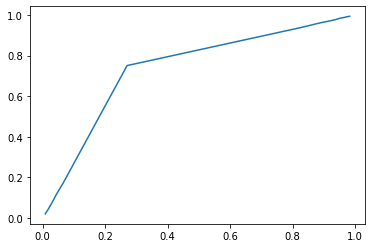

In [23]:
plt.plot(TPR,FPR)

### Method 2

In [6]:
classes = 5

In [9]:
temp = train_dataset[:,:]
f1 = temp[np.where(temp[:,10]==1)]
f1 = f1[:,3:4]   # Considering only one feature for ROC determination
f1 = np.column_stack((f1,np.ones(f1.shape[0])))
print(f1[:,0].mean())
f2 = temp[np.where(temp[:,10]==2)]
f2 = f2[:,3:4]    # Considering only one feature for ROC determination
f2 = np.column_stack((f2,np.zeros(f2.shape[0])))
print(f2[:,0].mean())

-0.009259915310876918
1.3879444040446494


In [11]:
f = np.row_stack((f1,f2))

In [12]:
TPR=[]
FPR=[]
for i in range(-6,6):
  TP=0
  FP=0
  TN=0
  FN=0
  for j in range(f.shape[0]):
    if f[j][0]>i and f[j][1]==1:
      TP=TP+1
    elif f[j][0]>i and f[j][1]==0:
      FP =FP+1
    elif f[j][0]<=i and f[j][1]==0:
      TN = TN+1
    else:
      FN = FN+1
  TPR.append(TP/(TP+FN))
  FPR.append(FP/(FP+TN))

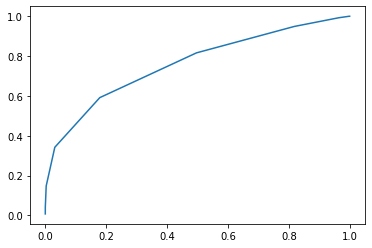

In [13]:
plt.plot(TPR,FPR)

## (vii) GMM

In [ ]:
def p3_split_dataset(dataset,train_ratio):
  classes = np.unique(dataset[:,-1])
  dataset_size = dataset.shape[0]
  count = int(train_ratio*(dataset_size))

  np.random.shuffle(dataset)
  train_dataset, test_dataset = dataset[:count,:], dataset[count:,:]

  return train_dataset,test_dataset

In [ ]:
def p3_normalize_data(dataset):
  row_Max = np.amax(dataset[:,:-1], axis=0)
  row_Min = np.amin(dataset[:,:-1], axis=0)
  dataset = np.c_[(dataset[:,:-1]-row_Min)/(row_Max-row_Min),dataset[:,-1]]
  return dataset

In [ ]:
def p3_GMM_training(train_dataset,epochs,number_of_Gaussian):
  min_class = int(np.min(train_dataset[:,-1]))
  classes = int(len(np.unique(train_dataset[:,-1])))
  dimension = train_dataset.shape[1]-1
  Const = 1/np.power(2*math.pi,dimension/2)


  Category_wise_train_data = []
  for i in range(classes):
    Category_wise_train_data.append(train_dataset[train_dataset[:,-1]==(i+min_class)][:,:-1])
  
  Means = []
  Variance = []
  Pi = []
    
  for digit_class in range(classes): 
    Category_wise_epochs = 0
    Category_wise_Means = np.random.uniform(0, 1,(dimension,number_of_Gaussian)) #np.zeros((dimension,number_of_Gaussian))
    Category_wise_Variance = np.identity(dimension)
    Category_wise_Variance = np.dstack([Category_wise_Variance]*number_of_Gaussian)

    Category_wise_Pi = np.ones(number_of_Gaussian)/number_of_Gaussian
        
    
    for Category_wise_epochs in range(epochs):
        # Calculating inverse of co-variance matrix
        Category_wise_Variance_inverse = np.identity(dimension)
        Category_wise_Variance_inverse = np.dstack([Category_wise_Variance_inverse]*number_of_Gaussian)

        for i in range(number_of_Gaussian):
            Category_wise_Variance_inverse[:,:,i] = np.linalg.inv(Category_wise_Variance[:,:,i])


        # calculating determinant
        Category_wise_Variance_det = np.zeros(number_of_Gaussian)

        for i in range(number_of_Gaussian):
            Category_wise_Variance_det[i] = np.linalg.det(Category_wise_Variance[:,:,i])
            
        
        Category_wise_Gamma = np.zeros((Category_wise_train_data[digit_class].shape[0],number_of_Gaussian))
        
        
        
        data_point_number = 0
        #Calculating Gamma for each datapoint and each class
        for data_point in Category_wise_train_data[digit_class]:
            Denominator = 0.0
            for k in range(number_of_Gaussian):
                temp1 = data_point-Category_wise_Means[:,k]
                temp2 = Category_wise_Variance_inverse[:,:,k]
                temp3 = (-1/2)*(temp1.T @ temp2 @ temp1)
                temp4 = np.exp(temp3)
                temp5 = np.power(Category_wise_Variance_det[k],-0.5)*temp4*Category_wise_Pi[k]
                Denominator += temp5

            Gamma_each_Gaussian = np.zeros(number_of_Gaussian)
            for k in range(number_of_Gaussian):
                temp6 = data_point-Category_wise_Means[:,k]

                temp7 = Category_wise_Variance_inverse[:,:,k]
                temp8 = (-1/2)*(temp6.T @ temp7 @ temp6)

                temp9 = np.exp(temp8)
                Numerator = np.power(Category_wise_Variance_det[k],-0.5)*temp9*Category_wise_Pi[k]

                Gamma_each_Gaussian[k] = (Numerator/Denominator)

            Category_wise_Gamma[data_point_number,:] = Gamma_each_Gaussian
            
            data_point_number += 1
            

        
        # Updating mean
        
        for k in range(number_of_Gaussian):
            meank = np.zeros(dimension)
            data_point_number = 0
            #updating mean in one line
            Category_wise_Means[:,k] = np.average(Category_wise_train_data[digit_class],axis = 0, weights=Category_wise_Gamma[:,k])
        

        
        Nk = np.sum(Category_wise_Gamma,axis = 0)

        for k in range(number_of_Gaussian):
            variancek = np.zeros((dimension,dimension))
            count = 0
            data_point_number = 0
            for data_point in Category_wise_train_data[digit_class]:
                v = data_point-Category_wise_Means[:,k]
                x = (v).reshape(v.shape[0],1)

                variancek = variancek + (x @ x.T ) * Category_wise_Gamma[data_point_number,k]
                data_point_number += 1
                
            Category_wise_Variance[:,:,k] = variancek/Nk[k]

            # retaining only diagonals
            temp = np.identity(len(Category_wise_Variance[:,:,k]))
            Category_wise_Variance[:,:,k] = Category_wise_Variance[:,:,k]*temp

        
        # Updating Pi
        
        
        Category_wise_Pi = Nk/Category_wise_train_data[digit_class].shape[0]
        
    Means.append(Category_wise_Means)
    Variance.append(Category_wise_Variance)
    Pi.append(Category_wise_Pi)
  return Means,Variance,Pi


In [ ]:
def p3_GMM_testing(test_dataset,classes,Means,Variance,Pi,number_of_Gaussian):
  min_class = int(np.min(test_dataset[:,-1]))
  dimension = test_dataset.shape[1]-1
  Variance_inverse = []
  # Calculating inverse of co-variance matrix
  for i in range(len(Variance)):
      
      Category_wise_Variance = Variance[i]
      
      Category_wise_Variance_inverse = np.identity(dimension)
      Category_wise_Variance_inverse = np.dstack([Category_wise_Variance_inverse]*number_of_Gaussian)
      
      for k in range(number_of_Gaussian):
          Category_wise_Variance_inverse[:,:,k] = np.linalg.inv(Category_wise_Variance[:,:,k])
      
      Variance_inverse.append(Category_wise_Variance_inverse)

  # Variance determinant
  Variance_det = []

  for i in range(len(Variance)):
      
      Category_wise_Variance = Variance[i]
      
      Category_wise_Variance_det = np.zeros(number_of_Gaussian)
      
      for k in range(number_of_Gaussian):
          Category_wise_Variance_det[k] = np.linalg.det(Category_wise_Variance[:,:,k])
      Variance_det.append(Category_wise_Variance_det)

  confusion_matrix = np.zeros((classes,classes))
  correct_predicted_labels = 0
  for data_point in test_dataset:
    probabilities = np.zeros(classes)

    for Class in range(classes):
      Inner_summation = 0.0

      for k in range(number_of_Gaussian):
        
        temp1 = data_point[:-1]-Means[Class][:,k]
        temp1 = (temp1).reshape(temp1.shape[0],1)
        temp2 = Variance_inverse[Class][:,:,k]
        temp3 = (-1/2)*(temp1.T @ temp2 @ temp1)
        temp4 = np.exp(temp3)
        temp5 = np.power(Variance_det[Class][k],-0.5)*temp4*Pi[Class][k]
        Inner_summation += temp5
      probabilities[Class] = Inner_summation
      
    predicted_class = np.argmax(probabilities) + min_class
    confusion_matrix[predicted_class-min_class][int(data_point[-1])-min_class] += 1
    if(predicted_class==int(data_point[-1])):
      correct_predicted_labels += 1


  accuracy = correct_predicted_labels/test_dataset.shape[0]

  return accuracy,confusion_matrix

In [ ]:
def p3_get_likelihood(dataset,Means,Variance,Pi,number_of_Gaussian):
  min_class = int(np.min(dataset[:,-1]))
  dimension = dataset.shape[1]-1
  Variance_inverse = []
  # Calculating inverse of co-variance matrix
  for i in range(len(Variance)):
      
      Category_wise_Variance = Variance[i]
      
      Category_wise_Variance_inverse = np.identity(dimension)
      Category_wise_Variance_inverse = np.dstack([Category_wise_Variance_inverse]*number_of_Gaussian)
      
      for k in range(number_of_Gaussian):
          Category_wise_Variance_inverse[:,:,k] = np.linalg.inv(Category_wise_Variance[:,:,k])
      
      Variance_inverse.append(Category_wise_Variance_inverse)

  # Variance determinant
  Variance_det = []

  for i in range(len(Variance)):
      
      Category_wise_Variance = Variance[i]
      
      Category_wise_Variance_det = np.zeros(number_of_Gaussian)
      
      for k in range(number_of_Gaussian):
          Category_wise_Variance_det[k] = np.linalg.det(Category_wise_Variance[:,:,k])
      Variance_det.append(Category_wise_Variance_det)

  log_likelihood = 0.0
  data_point_number = 0
  
  for data_point in dataset:
      Inner_summation = 0.0
      for k in range(number_of_Gaussian):
          temp1 = data_point[:-1]-Means[int(data_point[-1])-min_class][:,k]
          temp1 = (temp1).reshape(temp1.shape[0],1)
          temp2 = Variance_inverse[int(data_point[-1])-min_class][:,:,k]
          temp3 = (-1/2)*(temp1.T @ temp2 @ temp1)
          temp4 = np.exp(temp3)
          temp5 = np.power(Variance_det[int(data_point[-1])-min_class][k],-0.5)*temp4*Pi[int(data_point[-1])-min_class][k]
          Inner_summation += temp5
          
      log_likelihood += np.log(Inner_summation)
          
      data_point_number += 1
  
  return log_likelihood

In [ ]:
train_dataset = np.loadtxt('/content/drive/MyDrive/Prnn/p3_train.csv', delimiter=',', skiprows=0)
test_dataset = np.loadtxt('/content/drive/MyDrive/Prnn/p3_test.csv', delimiter=',', skiprows=0)

In [ ]:
train_dataset = p3_normalize_data(train_dataset)
test_dataset = p3_normalize_data(test_dataset)

Accuracy for  1  mixtures is :  0.5666
F1 scores for  1  mixtures is :  [0.5258532298227626, 0.5621639237412417, 0.6065422287931991, 0.5836831538601934, 0.5658965180605272]
Confusion matrix for  1  mixtures is :  [[1795.  526.  496.  508.  531.]
 [ 373. 1725.  339.  367.  352.]
 [ 185.  190. 1641.  173.  182.]
 [ 260.  213.  203. 1599.  229.]
 [ 358.  327.  361.  328. 1739.]]
Accuracy for  2  mixtures is :  0.5688666666666666
F1 scores for  2  mixtures is :  [0.5277330601492756, 0.5661848302744843, 0.6122979751068177, 0.5833181900781392, 0.56629653821032]
Confusion matrix for  2  mixtures is :  [[1803.  523.  495.  510.  531.]
 [ 370. 1743.  339.  366.  358.]
 [ 180.  177. 1648.  167.  171.]
 [ 260.  218.  206. 1605.  239.]
 [ 358.  320.  352.  327. 1734.]]
Accuracy for  3  mixtures is :  0.5696666666666667
F1 scores for  3  mixtures is :  [0.5305226174791392, 0.5643853389555628, 0.6106898464952839, 0.585792349726776, 0.5679659351457582]
Confusion matrix for  3  mixtures is :  [[1812. 

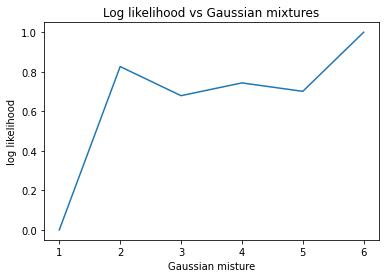

In [ ]:
classes = 5
y1 = np.zeros(6)
x1 = np.array([1,2,3,4,5,6])
for number_of_Gaussian in x1:
  Means1,Variance1,Pi1 = p3_GMM_training(train_dataset,5,number_of_Gaussian)
  accuracy1,confusion_matrix1 = p3_GMM_testing(test_dataset,5,Means1,Variance1,Pi1,number_of_Gaussian)
  TP1=[]
  TN1=[]
  FP1=[]
  FN1=[]
  F11=[]
  for i in range(classes):
    TP1.append(confusion_matrix1[i][i])
    TN1.append(np.sum(confusion_matrix1)-np.sum(confusion_matrix1[i,:])-np.sum(confusion_matrix1[:,i])+confusion_matrix1[i][i])
    FP1.append(np.sum(confusion_matrix1[i,:])-confusion_matrix1[i][i])
    FN1.append(np.sum(confusion_matrix1[:,i])-confusion_matrix1[i][i])
    F11.append((2*TP1[i])/(2*TP1[i] + FP1[i] + FN1[i]))
  y1[number_of_Gaussian-1] = p3_get_likelihood(train_dataset,Means1,Variance1,Pi1,number_of_Gaussian)
  print("Accuracy for ",number_of_Gaussian," mixtures is : ",accuracy1)
  print("F1 scores for ",number_of_Gaussian," mixtures is : ",F11)
  print("Confusion matrix for ",number_of_Gaussian," mixtures is : ",confusion_matrix1)

y1 = (y1-np.min(y1))/(np.max(y1)-np.min(y1))
plt.plot(x1,y1) 
plt.title("Log likelihood vs Gaussian mixtures") 
plt.xlabel("Gaussian misture") 
plt.ylabel("log likelihood") 
plt.show()

# Q4

In [533]:
# These following imports are required because we have to upload image files from drive to colab
import zipfile # To unzip
import os      # To upload files
import cv2     # To read image files

## Extracting images from ZIP files and importing to colab

In [534]:
# Set the path of the zip file in Google Drive
zip_path = "/content/drive/MyDrive/Prnn/Assignment1_resized_images.zip"

# Set the path to extract the zip file to in the Colab environment
extract_path = "/content"

# Extract the zip file to the specified path
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [535]:
extract_path = "/content/Assignment1_resized_images"

In [536]:
# Creating a list of list of images of particular class 
lst_img_clss = []
for class_folder in sorted(os.listdir(extract_path)):
  class_folder_path = os.path.join(extract_path, class_folder)
  temp = []
  for filename in sorted(os.listdir(class_folder_path)):
    file_paths = os.path.join(class_folder_path, filename)
    img = cv2.imread(file_paths)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    temp.append(gray_img)
  lst_img_clss.append(temp)

In [537]:
classes = len(lst_img_clss) # 10

## Creating dataset from images

In [538]:
X=[]
Y = []
for i in range(classes):
  tmp = []
  for j in range(len(lst_img_clss[i])):
    x = np.ndarray.flatten(lst_img_clss[i][j])
    tmp.append(x)
  a = np.stack(tmp,axis = 0)
  X.append(a)
  Y.append(i)


In [539]:
a = X[0]
b = np.zeros((X[0].shape[0],1))
dataset = np.column_stack((a,b))
for i in range(1,classes):
  a=X[i]
  b = i*np.ones((X[i].shape[0],1))
  temp = np.column_stack((a,b))
  dataset = np.row_stack((dataset,temp))

In [540]:
dataset.shape  # Overall dataset

(60000, 785)

## Creating functions for GMM

In [ ]:
def p4_split_dataset(dataset,train_ratio):
  classes = np.unique(dataset[:,-1])
  dataset_size = dataset.shape[0]
  count = int(train_ratio*(dataset_size))

  np.random.shuffle(dataset)
  train_dataset, test_dataset = dataset[:count,:], dataset[count:,:]

  return train_dataset,test_dataset

In [ ]:
def p4_GMM_training(train_dataset,epochs,number_of_Gaussian):
  min_class = int(np.min(train_dataset[:,-1]))
  classes = int(len(np.unique(train_dataset[:,-1])))
  dimension = train_dataset.shape[1]-1

  Category_wise_train_data = []
  
  for i in range(classes):
    Category_wise_train_data.append(train_dataset[train_dataset[:,-1]==(i+min_class)][:,:-1])
  

    
  Means = []
  Pi = []

  epochs = 10
  for digit_class in range(classes):
    Category_wise_epochs = 0
    Category_wise_Means = np.random.random_sample((dimension,number_of_Gaussian)) #np.random.uniform(0, 1,(dimension,number_of_Gaussian)) #np.zeros((dimension,number_of_Gaussian))
    Category_wise_Pi = np.ones(number_of_Gaussian)/number_of_Gaussian
    
    for Category_wise_epochs in range(epochs):            
        
        Category_wise_Gamma = np.zeros((Category_wise_train_data[digit_class].shape[0],number_of_Gaussian))
        
        
        data_point_number = 0
        
        #Calculating Gamma for each datapoint and each class
        for data_point in Category_wise_train_data[digit_class]:
            Gamma_each_Gaussian = np.zeros(number_of_Gaussian)
            for k in range(number_of_Gaussian):
                
                temp1 = data_point-Category_wise_Means[:,k]

                temp3 = (-1/2)*(np.power(np.linalg.norm(temp1),2))

                temp4 = np.exp(temp3)

                temp5 = temp4*Category_wise_Pi[k]

                Gamma_each_Gaussian[k] = temp5

            Gamma_each_Gaussian = Gamma_each_Gaussian/np.sum(Gamma_each_Gaussian)

            Category_wise_Gamma[data_point_number,:] = Gamma_each_Gaussian
            
            data_point_number += 1
            

        
        # Updating mean
        
        for k in range(number_of_Gaussian):
            #updating mean in one line
            Category_wise_Means[:,k] = np.average(Category_wise_train_data[digit_class],axis = 0, weights=Category_wise_Gamma[:,k])
        

        # Updating Co-variance matrix
        
        Nk = np.sum(Category_wise_Gamma,axis = 0)


        # Updating Pi
        
        Category_wise_Pi = Nk/Category_wise_train_data[digit_class].shape[0]
        
    Means.append(Category_wise_Means)
    Pi.append(Category_wise_Pi)
    
    
  return Means,Pi


In [ ]:
def p4_GMM_testing(test_dataset,classes,Means,Pi,number_of_Gaussian):
  min_class = int(np.min(test_dataset[:,-1]))
  dimension = test_dataset.shape[1]-1
  
  confusion_matrix = np.zeros((classes,classes))


  correct_predicted_labels = 0
  for data_point in test_dataset:

    probabilities = np.zeros(classes)

    for Class in range(classes):
    
      Inner_summation = 0.0
      for k in range(number_of_Gaussian):
        temp1 = data_point[:-1]-Means[Class][:,k]
        temp3 = (-1/2)*(np.power(np.linalg.norm(temp1),2))
        temp4 = np.exp(temp3)
        temp5 = temp4*Pi[Class][k]
        Inner_summation += temp5
      probabilities[Class] = Inner_summation
    predicted_class = np.argmax(probabilities)
    confusion_matrix[predicted_class][int(data_point[-1])] += 1
    if(predicted_class==int(data_point[-1])):
      correct_predicted_labels += 1


  accuracy = correct_predicted_labels/test_dataset.shape[0]

  return accuracy,confusion_matrix

In [ ]:
def p4_get_likelihood(dataset,Means,Pi,number_of_Gaussian):
  min_class = int(np.min(dataset[:,-1]))
  dimension = dataset.shape[1]-1
  

  log_likelihood = 0.0
  data_point_number = 0
  
  for data_point in dataset:
      Inner_summation = 0.0
      for k in range(number_of_Gaussian):
          temp1 = data_point[:-1]-Means[int(data_point[-1])-min_class][:,k]

          temp3 = (-1/2)*(np.power(np.linalg.norm(temp1),2))
          temp4 = np.exp(temp3)
          
          temp5 = temp4*Pi[int(data_point[-1])-min_class][k]
          Inner_summation += temp5
          
      log_likelihood += np.log(Inner_summation)
          
      data_point_number += 1
  
  return log_likelihood

In [ ]:
def p4_normalize_Image_dataset(dataset):
  dataset = np.c_[ dataset[:,:-1]/255, dataset[:,-1]]
  return dataset

In [ ]:
p4dataset = dataset


In [ ]:
p4dataset = p4_normalize_Image_dataset(p4dataset)

In [ ]:
np.set_printoptions(suppress=True)

## Model 1 - 20:80

In [68]:
# creating training and testing dataset
count = 1500 #per class
a=X[0]
a=a[0:count,:]/255       # Normalising else exponent becomes 0
b = np.zeros((a.shape[0],1))
train_dataset = np.column_stack((a,b))
a=X[0]
a=a[count:,:]/255
b = np.zeros((a.shape[0],1))
test_dataset = np.column_stack((a,b))
for i in range(1,classes):
  a=X[i]
  a=a[0:count,:]/255
  b = i*np.ones((a.shape[0],1))
  temp = np.column_stack((a,b))
  train_dataset = np.row_stack((train_dataset,temp))
  a=X[i]
  a=a[count:,:]/255
  b = i*np.ones((a.shape[0],1))
  temp = np.column_stack((a,b))
  test_dataset = np.row_stack((test_dataset,temp))


In [69]:
train_dataset.shape

(15000, 785)

In [70]:
test_dataset.shape

(45000, 785)

In [71]:
features = train_dataset.shape[1]-1 #784

In [72]:
# Initialising features and labels from dataset
X_test = test_dataset[:,:features]
X_train = train_dataset[:,:features]
Y_train = train_dataset[:,features]
Y_test = test_dataset[:,features]

### (i) Naive Bayes

In [ ]:
classes = 10
features = train_dataset.shape[1]-1

In [ ]:
# Creating list of numpy arrays containing training datas of each class with class as index of list 
temp = train_dataset
lst = []
for i in range(classes):
  x = temp[np.where(temp[:,features]==i)] # last column is my class indexes
  x = x[:,:features]
  lst.append(x)

In [ ]:
# 10 features' mean for each classes
mean=[] 
for i in range(classes):
  a=lst[i]
  a = a.mean(axis=0)
  mean.append(a)

#### Training

In [ ]:
count = 0
for i in range(X_train.shape[0]):
  g = []  #class conditionals
  for j in range(classes):
    v = (X_train[i]-mean[j])
    v = np.power(v,2)
    k = 0.5 * np.sum(v)
    k = math.exp(-k)
    g.append(k)
  k = g.index(max(g))
  if k==int(Y_train[i]):
    count=count+1

In [ ]:
print('The training accuracy is:')
print(count*100/X_train.shape[0])

The training accuracy is:
83.74


#### Testing

In [ ]:
conf_matrix = np.zeros((classes,classes))
count = 0
for i in range(X_test.shape[0]):
  g = []  #class conditionals
  for j in range(classes):
    v = (X_test[i]-mean[j])
    v = np.power(v,2)
    k = 0.5 * np.sum(v)
    #k = math.exp(-k)
    g.append(k)
  k = g.index(min(g))
  if k==int(Y_test[i]):
    count=count+1
  v = int(Y_test[i])
  conf_matrix[v][k] += 1

In [ ]:
print('The testing accuracy is:')
print(count*100/X_test.shape[0])

The testing accuracy is:
84.36


In [ ]:
print('The confusion matrix for above testing data is:')
print(conf_matrix.astype(int))

The confusion matrix for above testing data is:
[[3760  341    0   85   92    1    8  101   55   57]
 [  62 3823    0  285  118    7    1   37   16  151]
 [ 161   32 3601  123   19  460   10   77   11    6]
 [  40    3    2 3850  124   33   81  365    1    1]
 [   1    2    0   54 4255   67    0   97    8   16]
 [   1   28   25  274  318 3762    6   29   29   28]
 [   3    2    1   23   17   36 3744  662    2   10]
 [   3    2    2  191   60   10 1202 3028    2    0]
 [ 145   26    1   14   25   17    7   14 4188   63]
 [  66   34    0    6  167   12    8  117  139 3951]]


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [ ]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.8602150537634409, 0.8695553281018993, 0.8856369896704378, 0.8187134502923976, 0.8777720474471377, 0.8449185850645705, 0.7826904985888994, 0.6708762601085632, 0.9357613674449782, 0.8996925879540021]


### (ii) Logistic regression

In [73]:
classes = 10
features = train_dataset.shape[1] #785 after augmented data

In [74]:
#RUN only ONCE
tmp = np.ones((X_train.shape[0],1))  # Creating augmented data
X_train=np.column_stack((X_train,tmp))
X_train.shape

(15000, 785)

In [75]:
tmp = np.ones((X_test.shape[0],1))  # Creating augmented data
X_test=np.column_stack((X_test,tmp))
X_test.shape

(45000, 785)

#### Training

In [76]:
W=[]
for i in range(classes):
  W.append(np.ones((features,1)))

In [77]:
def calc_loss(x,W,j):
  x=x.reshape((x.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for i in range(classes):
    e.append(math.exp(W[i].T@x))
  k = sum(e)
  for i in range(classes):
    g.append(e[i]/k)
  loss = -1*math.log(g[j])     # loss for 1 image
  for i in range(classes):
    if i!=j:
      grad.append(-g[i]*x.reshape(x.shape[0]))
    else:
      grad.append((1-g[i])*x.reshape(x.shape[0]))
  return loss,grad

In [78]:
def train_epoch1():
  final_loss = 0
  final_grad = np.zeros((features,classes))
  for i in range(X_train.shape[0]):
    loss,grad = calc_loss(X_train[i,:],W,int(Y_train[i]))
    final_loss =final_loss + loss
    final_grad = final_grad + np.stack(grad,axis = 1)
  return final_loss,final_grad

In [79]:
epochs = 50
alpha = 10
prev_loss = 0
for i in range(epochs):
  loss,grad = train_epoch1()
  for j in range(classes):
    gradient = grad[:,j].reshape(grad[:,j].shape[0],1)
    if prev_loss<loss:
      alpha = (alpha/10)
    W[j]=W[j]+alpha*gradient/np.linalg.norm(gradient)
    prev_loss = loss
  print('loss in',i,'epoch is',loss/X_train.shape[0])

loss in 0 epoch is 2.302585092994409
loss in 1 epoch is 1.116065690390648
loss in 2 epoch is 15.448510782036953
loss in 3 epoch is 13.785077708545925
loss in 4 epoch is 12.121777670357574
loss in 5 epoch is 10.458548464747944
loss in 6 epoch is 8.79536682651854
loss in 7 epoch is 7.132227013739376
loss in 8 epoch is 5.469542241388709
loss in 9 epoch is 3.8282372188040674
loss in 10 epoch is 2.5181019198708374
loss in 11 epoch is 1.330806733841259
loss in 12 epoch is 0.9624550921498767
loss in 13 epoch is 1.2827477812125414
loss in 14 epoch is 1.1723119540063145
loss in 15 epoch is 1.0759492890134754
loss in 16 epoch is 0.9957419545088523
loss in 17 epoch is 0.9316261355341784
loss in 18 epoch is 0.8814754956500138
loss in 19 epoch is 0.8489224059904316
loss in 20 epoch is 0.8354553755146794
loss in 21 epoch is 0.8311046492283262
loss in 22 epoch is 0.8292034797048633
loss in 23 epoch is 0.8259725393861008
loss in 24 epoch is 0.823961330183957
loss in 25 epoch is 0.8209350594237329
loss

In [80]:
W[0].shape

(785, 1)

In [81]:
print('Empirical risk on training data is:')
print(loss/X_train.shape[0])  # Doing 1/n

Empirical risk on training data is:
0.7735358190087274


#### Testing

In [82]:
conf_matrix = np.zeros((classes,classes))
count = 0
loss = 0
for i in range(X_test.shape[0]):
  X = X_test[i,:]
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for j in range(classes):
    e.append(math.exp(W[j].T@X))
  k = sum(e)
  for j in range(classes):
    g.append(e[j]/k)
  k = g.index(max(g))
  if k==Y_test[i]:
    count = count+1
  v = int(Y_test[i])
  conf_matrix[v][k] += 1

  loss = loss - 1*math.log(g[v])

In [83]:
print('The testing accuracy is:')
print(count*100/X_test.shape[0])

The testing accuracy is:
86.13333333333334


In [84]:
print('Empirical risk on testing data is:')
print(loss/X_test.shape[0])

Empirical risk on testing data is:
0.7485922734396865


In [85]:
print('The confusion matrix for above testing data is:')
print(conf_matrix.astype(int))

The confusion matrix for above testing data is:
[[3925  286    1   60   70    0    9   32   88   29]
 [  98 3876    0  221  120   10    4    8   25  138]
 [ 184   18 3872   82   17  288    7   10   20    2]
 [  64    2    4 4018  124   34   97  151    5    1]
 [   1    1    0   56 4309   62    0   43   17   11]
 [   3   26   34  250  333 3758    8   13   53   22]
 [   4    1    3   22   29   31 3975  419    4   12]
 [   5    1    2  388   73   10 1227 2790    3    1]
 [  72   13    2    6   17    4   10    2 4338   36]
 [  94   18    0    7  188   12   11   86  185 3899]]


In [86]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [87]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.8770949720670391, 0.8867536032944406, 0.9199334758850083, 0.8362122788761707, 0.8811860940695296, 0.8630152715581583, 0.8072705117790414, 0.6928234417680655, 0.9391643212816627, 0.9013986822332678]


### (iii) GMM

Accuracy for  1  mixtures is :  0.8557916666666666
F1 scores  1  mixtures is :  [0.8500746427809768, 0.8876706661150187, 0.927542654553512, 0.8338667442537097, 0.8762309326124734, 0.8933711524319782, 0.8043860556532534, 0.7025721784776903, 0.8857236770023008, 0.902239677316633]
Confusion matrix for  1  mixtures is :  [[3986.   82.  133.   38.   11.    1.    3.   24.  184.   83.]
 [ 339. 4291.   32.    4.    1.   21.    3.    3.  116.    8.]
 [   0.    0. 4186.    2.    0.   40.    4.    4.    2.    0.]
 [ 174.  217.  110. 4299.   54.  208.   50.  308.   66.   19.]
 [  85.   85.    6.  158. 4538.  196.   30.  204.   99.  204.]
 [   7.   16.  170.   48.   88. 4252.   36.   17.   85.   10.]
 [   8.    0.    4.   34.    5.   15. 3888.  893.   20.   12.]
 [  46.   11.  138.  222.   29.   27.  767. 3346.    7.  128.]
 [ 142.   36.    6.    0.    7.   19.    0.    1. 4042.  109.]
 [  46.  112.    3.    1.   20.   11.    7.    4.  144. 4250.]]
Accuracy for  2  mixtures is :  0.8788333333333334

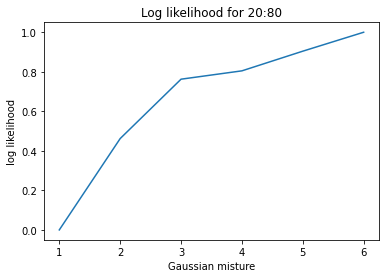

In [ ]:
train_dataset1,test_dataset1 = p4_split_dataset(p4dataset,0.2)
classes = 10
y1 = np.zeros(6)
x1 = np.array([1,2,3,4,5,6])
for number_of_Gaussian in x1:
  Means1,Pi1 = p4_GMM_training(train_dataset1,5,number_of_Gaussian)
  accuracy1,confusion_matrix1 = p4_GMM_testing(test_dataset1,10,Means1,Pi1,number_of_Gaussian)
  TP1=[]
  TN1=[]
  FP1=[]
  FN1=[]
  F11=[]
  for i in range(classes):
    TP1.append(confusion_matrix1[i][i])
    TN1.append(np.sum(confusion_matrix1)-np.sum(confusion_matrix1[i,:])-np.sum(confusion_matrix1[:,i])+confusion_matrix1[i][i])
    FP1.append(np.sum(confusion_matrix1[i,:])-confusion_matrix1[i][i])
    FN1.append(np.sum(confusion_matrix1[:,i])-confusion_matrix1[i][i])
    F11.append((2*TP1[i])/(2*TP1[i] + FP1[i] + FN1[i]))
  y1[number_of_Gaussian-1] = p4_get_likelihood(train_dataset1,Means1,Pi1,number_of_Gaussian)
  print("Accuracy for ",number_of_Gaussian," mixtures is : ",accuracy1)
  print("F1 scores ",number_of_Gaussian," mixtures is : ",F11)
  print("Confusion matrix for ",number_of_Gaussian," mixtures is : ",confusion_matrix1)

y1 = (y1-np.min(y1))/(np.max(y1)-np.min(y1))
plt.plot(x1,y1) 
plt.title("Log likelihood for 20:80") 
plt.xlabel("Gaussian misture") 
plt.ylabel("log likelihood") 
plt.show()

## Model 2 - 30:70

Again initialising dataset as X was used variable elsewhere

In [88]:
X=[]
Y = []
for i in range(classes):
  tmp = []
  for j in range(len(lst_img_clss[i])):
    x = np.ndarray.flatten(lst_img_clss[i][j])
    tmp.append(x)
  a = np.stack(tmp,axis = 0)
  X.append(a)
  Y.append(i)


In [89]:
a = X[0]
b = np.zeros((X[0].shape[0],1))
dataset = np.column_stack((a,b))
for i in range(1,classes):
  a=X[i]
  b = i*np.ones((X[i].shape[0],1))
  temp = np.column_stack((a,b))
  dataset = np.row_stack((dataset,temp))

In [90]:
dataset.shape  # Overall dataset

(60000, 785)

In [91]:
# creating training and testing dataset
count = 1800 #per class
a=X[0]
a=a[0:count,:]/255       # Normalising else exponent becomes 0
b = np.zeros((a.shape[0],1))
train_dataset = np.column_stack((a,b))
a=X[0]
a=a[count:,:]/255
b = np.zeros((a.shape[0],1))
test_dataset = np.column_stack((a,b))
for i in range(1,classes):
  a=X[i]
  a=a[0:count,:]/255
  b = i*np.ones((a.shape[0],1))
  temp = np.column_stack((a,b))
  train_dataset = np.row_stack((train_dataset,temp))
  a=X[i]
  a=a[count:,:]/255
  b = i*np.ones((a.shape[0],1))
  temp = np.column_stack((a,b))
  test_dataset = np.row_stack((test_dataset,temp))


In [92]:
train_dataset.shape

(18000, 785)

In [93]:
test_dataset.shape

(42000, 785)

In [94]:
features = train_dataset.shape[1]-1 #784

In [95]:
# Initialising features and labels from dataset
X_test = test_dataset[:,:features]
X_train = train_dataset[:,:features]
Y_train = train_dataset[:,features]
Y_test = test_dataset[:,features]

### (i) Naive Bayes

In [ ]:
classes = 10
features = train_dataset.shape[1]-1

In [ ]:
# Creating list of numpy arrays containing training datas of each class with class as index of list 
temp = train_dataset
lst = []
for i in range(classes):
  x = temp[np.where(temp[:,features]==i)] # last column is my class indexes
  x = x[:,:features]
  lst.append(x)

In [ ]:
# 10 features' mean for each classes
mean=[] 
for i in range(classes):
  a=lst[i]
  a = a.mean(axis=0)
  mean.append(a)

#### Training

In [ ]:
count = 0
for i in range(X_train.shape[0]):
  g = []  #class conditionals
  for j in range(classes):
    v = (X_train[i]-mean[j])
    v = np.power(v,2)
    k = 0.5 * np.sum(v)
    k = math.exp(-k)
    g.append(k)
  k = g.index(max(g))
  if k==int(Y_train[i]):
    count=count+1

In [ ]:
print('The training accuracy is:')
print(count*100/X_train.shape[0])

The training accuracy is:
84.25


#### Testing

In [ ]:
conf_matrix = np.zeros((classes,classes))
count = 0
for i in range(X_test.shape[0]):
  g = []  #class conditionals
  for j in range(classes):
    v = (X_test[i]-mean[j])
    v = np.power(v,2)
    k = 0.5 * np.sum(v)
    #k = math.exp(-k)
    g.append(k)
  k = g.index(min(g))
  if k==int(Y_test[i]):
    count=count+1
  v = int(Y_test[i])
  conf_matrix[v][k] += 1

In [ ]:
print('The testing accuracy is:')
print(count*100/X_test.shape[0])

The testing accuracy is:
84.37857142857143


In [ ]:
print('The confusion matrix for above testing data is:')
print(conf_matrix.astype(int))

The confusion matrix for above testing data is:
[[3449  353    0   66   96    1    8  110   57   60]
 [  55 3626    0  206  112    7    2   37   18  137]
 [ 115   36 3352   89   29  481    6   72   11    9]
 [  38    4    2 3512  138   48   76  379    1    2]
 [   0    1    0   23 3987   71    0  102    4   12]
 [   1   27   32  165  302 3583   14   26   27   23]
 [   3    0    1   15   15   34 3487  635    1    9]
 [   3    2    2  149   47   10 1165 2820    2    0]
 [  95   25    1   15   27   20    4    9 3939   65]
 [  53   26    0    4  178    9    9  122  115 3684]]


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [ ]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.8609585621567648, 0.8737349397590362, 0.8832674571805007, 0.8318332543818096, 0.8732887964078414, 0.8466446124763705, 0.7773938245457586, 0.6625939849624061, 0.9406567164179105, 0.8984270210949884]


### (ii) Logistic regression

In [96]:
classes = 10
features = train_dataset.shape[1] #785 after augmented data

In [97]:
tmp = np.ones((X_train.shape[0],1))  # Creating augmented data
X_train=np.column_stack((X_train,tmp))
X_train.shape

(18000, 785)

In [98]:
tmp = np.ones((X_test.shape[0],1))  # Creating augmented data
X_test=np.column_stack((X_test,tmp))
X_test.shape

(42000, 785)

#### Training

In [99]:
W=[]
for i in range(classes):
  W.append(np.ones((features,1)))

In [100]:
def calc_loss(X,W,j):
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for i in range(classes):
    e.append(math.exp(W[i].T@X))
  k = sum(e)
  for i in range(classes):
    g.append(e[i]/k)
  loss = -1*math.log(g[j])     # loss for 1 image
  for i in range(classes):
    if i!=j:
      grad.append(-g[i]*X.reshape(X.shape[0]))
    else:
      grad.append((1-g[i])*X.reshape(X.shape[0]))
  return loss,grad

In [101]:
def train_epoch1():
  final_loss = 0
  final_grad = np.zeros((features,classes))
  for i in range(X_train.shape[0]):
    loss,grad = calc_loss(X_train[i,:],W,int(Y_train[i]))
    final_loss =final_loss + loss
    final_grad = final_grad + np.stack(grad,axis = 1)
  return final_loss,final_grad

In [102]:
epochs = 50
alpha = 10
prev_loss = 0
for i in range(epochs):
  loss,grad = train_epoch1()
  for j in range(classes):
    gradient = grad[:,j].reshape(grad[:,j].shape[0],1)
    if prev_loss<loss:
      alpha = (alpha/10)
    W[j]=W[j]+alpha*gradient/np.linalg.norm(gradient)
    prev_loss = loss
  print('loss in',i,'epoch is',loss/X_train.shape[0])

loss in 0 epoch is 2.302585092993949
loss in 1 epoch is 1.109937657051293
loss in 2 epoch is 15.64977940250885
loss in 3 epoch is 14.867888941254881
loss in 4 epoch is 13.995138011698831
loss in 5 epoch is 13.100708589633108
loss in 6 epoch is 12.307237875519634
loss in 7 epoch is 11.40377291053196
loss in 8 epoch is 10.619744783719701
loss in 9 epoch is 9.7100985645489
loss in 10 epoch is 8.932746719906728
loss in 11 epoch is 8.018582031067721
loss in 12 epoch is 7.246156543602161
loss in 13 epoch is 6.328672832902279
loss in 14 epoch is 5.56002037994501
loss in 15 epoch is 4.642430033140454
loss in 16 epoch is 3.88123865285457
loss in 17 epoch is 3.034157068900151
loss in 18 epoch is 2.370007416795513
loss in 19 epoch is 1.7839059625244453
loss in 20 epoch is 1.2491039263548163
loss in 21 epoch is 1.1972351009497333
loss in 22 epoch is 1.2154048923244392
loss in 23 epoch is 1.1047158906988248
loss in 24 epoch is 1.0118033866178344
loss in 25 epoch is 0.9372004136921211
loss in 26 epo

In [103]:
print('Empirical risk on training data is:')
print(loss/X_train.shape[0])

Empirical risk on training data is:
0.7282317224520557


#### Testing

In [104]:
conf_matrix = np.zeros((classes,classes))
count = 0
loss=0
for i in range(X_test.shape[0]):
  X = X_test[i,:]
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for j in range(classes):
    e.append(math.exp(W[j].T@X))
  k = sum(e)
  for j in range(classes):
    g.append(e[j]/k)
  k = g.index(max(g))
  if k==Y_test[i]:
    count = count+1
  v = int(Y_test[i])
  conf_matrix[v][k] += 1

  loss = loss - 1*math.log(g[v])

In [105]:
print('The testing accuracy is:')
print(count*100/X_test.shape[0])

The testing accuracy is:
87.02857142857142


In [106]:
print('Empirical risk on testing data is:')
print(loss/X_test.shape[0])

Empirical risk on testing data is:
0.7178242339485161


In [107]:
print('The confusion matrix for above testing data is:')
print(conf_matrix.astype(int))

The confusion matrix for above testing data is:
[[3613  298    4   49   42    0    5   42   76   71]
 [  91 3661    0  169   57   13    2    9   22  176]
 [ 112   22 3762   54    8  204    3   11   18    6]
 [  63    4   19 3721  100   49   58  179    4    3]
 [   1    1    0   36 3944   79    0   86   17   36]
 [   3   30   46  159  218 3623    4   17   47   53]
 [   4    0    9   18   15   39 3570  526    4   15]
 [   5    1   15  275   41   17 1009 2832    3    2]
 [  62   17    2    6   12    7    2    2 4036   54]
 [  60    3    0    4  103    6   10   92  132 3790]]


In [108]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [109]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.879717555393231, 0.8889158674274614, 0.9338463447933474, 0.8562881141410654, 0.9025171624713959, 0.879689207235644, 0.8055962992214826, 0.7083541770885443, 0.9431008295361608, 0.901736854627647]


### (iii) GMM

Accuracy for  1  mixtures is :  0.8521904761904762
F1 scores  1  mixtures is :  [0.8436345727653287, 0.8895472860867504, 0.9238683127572016, 0.8289488289488289, 0.8753635678121297, 0.8943584744730109, 0.7947882736156352, 0.685672867842474, 0.8913931888544891, 0.9009250243427459]
Confusion matrix for  1  mixtures is :  [[3426.   65.  121.   31.    4.    1.    5.   20.  152.   79.]
 [ 315. 3753.   32.    4.    2.   20.    1.    1.   79.    9.]
 [   1.    0. 3592.    1.    0.   30.    2.    5.    1.    0.]
 [ 161.  200.  101. 3734.   40.  202.   48.  268.   62.   19.]
 [  89.   78.    9.  143. 4063.  178.   32.  180.   96.  194.]
 [   4.   12.  145.   36.   72. 3670.   29.   11.   55.   12.]
 [   9.    1.    2.   23.    1.   16. 3416.  854.   19.   12.]
 [  50.   14.  134.  202.   22.   20.  706. 2838.    8.  102.]
 [ 123.   16.    5.    0.    6.   17.    0.    2. 3599.  100.]
 [  40.   83.    3.    0.   11.    7.    4.    3.  136. 3701.]]
Accuracy for  2  mixtures is :  0.881547619047619

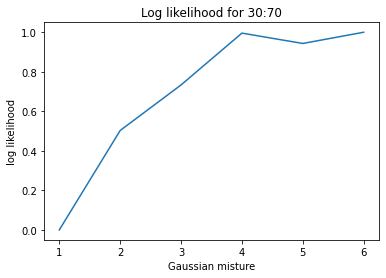

In [ ]:
train_dataset2,test_dataset2 = p4_split_dataset(p4dataset,0.3)
classes = 10
y2 = np.zeros(6)
x2 = np.array([1,2,3,4,5,6])
for number_of_Gaussian in x2:
  Means2,Pi2 = p4_GMM_training(train_dataset2,5,number_of_Gaussian)
  accuracy2,confusion_matrix2 = p4_GMM_testing(test_dataset2,10,Means2,Pi2,number_of_Gaussian)
  TP2=[]
  TN2=[]
  FP2=[]
  FN2=[]
  F12=[]
  for i in range(classes):
    TP2.append(confusion_matrix2[i][i])
    TN2.append(np.sum(confusion_matrix2)-np.sum(confusion_matrix2[i,:])-np.sum(confusion_matrix2[:,i])+confusion_matrix2[i][i])
    FP2.append(np.sum(confusion_matrix2[i,:])-confusion_matrix2[i][i])
    FN2.append(np.sum(confusion_matrix2[:,i])-confusion_matrix2[i][i])
    F12.append((2*TP2[i])/(2*TP2[i] + FP2[i] + FN2[i]))
  y2[number_of_Gaussian-1] = p4_get_likelihood(train_dataset2,Means2,Pi2,number_of_Gaussian)
  print("Accuracy for ",number_of_Gaussian," mixtures is : ",accuracy2)
  print("F1 scores ",number_of_Gaussian," mixtures is : ",F12)
  print("Confusion matrix for ",number_of_Gaussian," mixtures is : ",confusion_matrix2)

y2 = (y2-np.min(y2))/(np.max(y2)-np.min(y2))
plt.plot(x2,y2) 
plt.title("Log likelihood for 30:70") 
plt.ylabel("log likelihood") 
plt.xlabel("Gaussian misture") 
plt.show()

## Model 3 - 50:50

Again initialising dataset as X was used variable elsewhere

In [110]:
X=[]
Y = []
for i in range(classes):
  tmp = []
  for j in range(len(lst_img_clss[i])):
    x = np.ndarray.flatten(lst_img_clss[i][j])
    tmp.append(x)
  a = np.stack(tmp,axis = 0)
  X.append(a)
  Y.append(i)


In [111]:
a = X[0]
b = np.zeros((X[0].shape[0],1))
dataset = np.column_stack((a,b))
for i in range(1,classes):
  a=X[i]
  b = i*np.ones((X[i].shape[0],1))
  temp = np.column_stack((a,b))
  dataset = np.row_stack((dataset,temp))

In [112]:
dataset.shape  # Overall dataset

(60000, 785)

In [113]:
# creating training and testing dataset
count = 3000 #per class
a=X[0]
a=a[0:count,:]/255       # Normalising else exponent becomes 0
b = np.zeros((a.shape[0],1))
train_dataset = np.column_stack((a,b))
a=X[0]
a=a[count:,:]/255
b = np.zeros((a.shape[0],1))
test_dataset = np.column_stack((a,b))
for i in range(1,classes):
  a=X[i]
  a=a[0:count,:]/255
  b = i*np.ones((a.shape[0],1))
  temp = np.column_stack((a,b))
  train_dataset = np.row_stack((train_dataset,temp))
  a=X[i]
  a=a[count:,:]/255
  b = i*np.ones((a.shape[0],1))
  temp = np.column_stack((a,b))
  test_dataset = np.row_stack((test_dataset,temp))


In [114]:
train_dataset.shape

(30000, 785)

In [115]:
test_dataset.shape

(30000, 785)

In [116]:
features = train_dataset.shape[1]-1 #784

In [117]:
# Initialising features and labels from dataset
X_test = test_dataset[:,:features]
X_train = train_dataset[:,:features]
Y_train = train_dataset[:,features]
Y_test = test_dataset[:,features]

### (i) Naive Bayes

In [ ]:
classes = 10
features = train_dataset.shape[1]-1

In [ ]:
# Creating list of numpy arrays containing training datas of each class with class as index of list 
temp = train_dataset
lst = []
for i in range(classes):
  x = temp[np.where(temp[:,features]==i)] # last column is my class indexes
  x = x[:,:features]
  lst.append(x)

In [ ]:
# 10 features' mean for each classes
mean=[] 
for i in range(classes):
  a=lst[i]
  a = a.mean(axis=0)
  mean.append(a)

#### Training

In [ ]:
count = 0
for i in range(X_train.shape[0]):
  g = []  #class conditionals
  for j in range(classes):
    v = (X_train[i]-mean[j])
    v = np.power(v,2)
    k = 0.5 * np.sum(v)
    k = math.exp(-k)
    g.append(k)
  k = g.index(max(g))
  if k==int(Y_train[i]):
    count=count+1

In [ ]:
print('The training accuracy is:')
print(count*100/X_train.shape[0])

The training accuracy is:
84.82333333333334


#### Testing

In [ ]:
conf_matrix = np.zeros((classes,classes))
count = 0
for i in range(X_test.shape[0]):
  g = []  #class conditionals
  for j in range(classes):
    v = (X_test[i]-mean[j])
    v = np.power(v,2)
    k = 0.5 * np.sum(v)
    #k = math.exp(-k)
    g.append(k)
  k = g.index(min(g))
  if k==int(Y_test[i]):
    count=count+1
  v = int(Y_test[i])
  conf_matrix[v][k] += 1

In [ ]:
print('The testing accuracy is:')
print(count*100/X_test.shape[0])

The testing accuracy is:
86.12


In [ ]:
print('The confusion matrix for above testing data is:')
print(conf_matrix.astype(int))

The confusion matrix for above testing data is:
[[2633  188    0   27   37    1   10   46   46   12]
 [  54 2712    0   89   57    7    1    5   32   43]
 [  96   32 2503   97   12  177    6   68    6    3]
 [  34    2    0 2631  106   22   39  165    0    1]
 [   1    1    0    9 2863   83    0   32    4    7]
 [   1   29   29  105  198 2580    7   16   18   17]
 [   1    1    0   16   15   15 2509  437    0    6]
 [   2    1    2  122   31   11  909 1920    2    0]
 [  62    5    1    1    7   10    2    2 2854   56]
 [  51   13    0    3   93    4    6   81  118 2631]]


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [ ]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.8872788542544229, 0.9064171122994652, 0.9044263775971093, 0.8626229508196721, 0.8920392584514721, 0.8730964467005076, 0.7733086762212976, 0.6652806652806653, 0.9388157894736842, 0.91101108033241]


### (ii) Logistic regression

In [118]:
classes = 10
features = train_dataset.shape[1] #785 after augmented data

In [119]:
tmp = np.ones((X_train.shape[0],1))  # Creating augmented data
X_train=np.column_stack((X_train,tmp))
X_train.shape

(30000, 785)

In [120]:
tmp = np.ones((X_test.shape[0],1))  # Creating augmented data
X_test=np.column_stack((X_test,tmp))
X_test.shape

(30000, 785)

#### Training

In [121]:
W=[]
for i in range(classes):
  W.append(np.ones((features,1)))

In [122]:
def calc_loss(X,W,j):
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for i in range(classes):
    e.append(math.exp(W[i].T@X))
  k = sum(e)
  for i in range(classes):
    g.append(e[i]/k)
  loss = -1*math.log(g[j])     # loss for 1 image
  for i in range(classes):
    if i!=j:
      grad.append(-g[i]*X.reshape(X.shape[0]))
    else:
      grad.append((1-g[i])*X.reshape(X.shape[0]))
  return loss,grad

In [123]:
def train_epoch1():
  final_loss = 0
  final_grad = np.zeros((features,classes))
  for i in range(X_train.shape[0]):
    loss,grad = calc_loss(X_train[i,:],W,int(Y_train[i]))
    final_loss =final_loss + loss
    final_grad = final_grad + np.stack(grad,axis = 1)
  return final_loss,final_grad

In [124]:
epochs = 50
alpha = 10
prev_loss = 0
for i in range(epochs):
  loss,grad = train_epoch1()
  for j in range(classes):
    gradient = grad[:,j].reshape(grad[:,j].shape[0],1)
    if prev_loss<loss:
      alpha = (alpha/10)
    W[j]=W[j]+alpha*gradient/np.linalg.norm(gradient)
    prev_loss = loss
  print('loss in',i,'epoch is',loss/X_train.shape[0])

loss in 0 epoch is 2.3025850929934024
loss in 1 epoch is 1.1015164807183533
loss in 2 epoch is 15.996749007512783
loss in 3 epoch is 14.35179918806085
loss in 4 epoch is 12.689189031466176
loss in 5 epoch is 11.026585417436387
loss in 6 epoch is 9.36398815061454
loss in 7 epoch is 7.701397068861428
loss in 8 epoch is 6.0388135044398785
loss in 9 epoch is 4.3763354097555185
loss in 10 epoch is 2.7200301749632256
loss in 11 epoch is 1.2546646708158582
loss in 12 epoch is 1.1722500880166393
loss in 13 epoch is 1.093281597799932
loss in 14 epoch is 1.1808245654379308
loss in 15 epoch is 1.0583677820552513
loss in 16 epoch is 0.9662088709445491
loss in 17 epoch is 0.9003420226318095
loss in 18 epoch is 0.8582080847454168
loss in 19 epoch is 0.8345208021277007
loss in 20 epoch is 0.8258655895933181
loss in 21 epoch is 0.8215476513913776
loss in 22 epoch is 0.8190065983794665
loss in 23 epoch is 0.8178066409533886
loss in 24 epoch is 0.8149161090283084
loss in 25 epoch is 0.8134515281225305
l

In [125]:
print('Empirical risk on training data is:')
print(loss/X_train.shape[0])

Empirical risk on training data is:
0.7682224303085692


#### Testing

In [126]:
conf_matrix = np.zeros((classes,classes))
count = 0
loss = 0
for i in range(X_test.shape[0]):
  X = X_test[i,:]
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for j in range(classes):
    e.append(math.exp(W[j].T@X))
  k = sum(e)
  for j in range(classes):
    g.append(e[j]/k)
  k = g.index(max(g))
  if k==Y_test[i]:
    count = count+1
  v = int(Y_test[i])
  conf_matrix[v][k] += 1

  loss = loss - 1*math.log(g[v])

In [127]:
print('The testing accuracy is:')
print(count*100/X_test.shape[0])

The testing accuracy is:
87.68333333333334


In [128]:
print('Empirical risk on testing data is:')
print(loss/X_test.shape[0])

Empirical risk on testing data is:
0.7132966042489008


In [129]:
print('The confusion matrix for above testing data is:')
print(conf_matrix.astype(int))

The confusion matrix for above testing data is:
[[2575  243    2   12   33    1    7   46   74    7]
 [  19 2830    0   32   56    9    1    4   21   28]
 [  77   30 2682   43    7  114    3   34    9    1]
 [  43    8    1 2547  130   41   29  199    0    2]
 [   1    1    0    6 2853   96    0   27   10    6]
 [   0   37   30   40  166 2684    1   12   23    7]
 [   1    4    1    7   20   27 2460  475    0    5]
 [   2    1    8   96   33   24  677 2156    3    0]
 [  23    4    1    0    7    8    0    2 2928   27]
 [  41   18    0    1   95   10    6   77  162 2590]]


In [130]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [131]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.8906952611553096, 0.9164507772020726, 0.9369432314410481, 0.8807053941908713, 0.8915625, 0.8925839707349518, 0.795601552393273, 0.7148541114058355, 0.9399678972712681, 0.9130971267407015]


### (iii) GMM

Accuracy for  1  mixtures is :  0.8584666666666667
F1 scores  1  mixtures is :  [0.8493528904227783, 0.8931156370981316, 0.9281255573390405, 0.8276721720162045, 0.8889567740950054, 0.8945803040317251, 0.8041136141038198, 0.69926733685466, 0.8971583220568335, 0.9063317634746206]
Confusion matrix for  1  mixtures is :  [[2461.   35.   86.   24.    4.    1.    3.   17.  115.   51.]
 [ 218. 2653.   26.    2.    1.   16.    2.    1.   58.    8.]
 [   1.    0. 2602.    1.    0.   28.    3.    6.    1.    0.]
 [ 116.  131.   63. 2656.   32.  143.   38.  200.   48.   11.]
 [  59.   41.    4.   88. 2910.  124.   20.  107.   53.  114.]
 [   3.   10.  105.   32.   45. 2707.   19.   10.   50.    9.]
 [   4.    0.    4.   25.    0.   12. 2463.  588.   16.    5.]
 [  27.    5.   72.  150.   18.   16.  460. 2052.    6.   79.]
 [  80.   20.    0.    0.    5.   11.    0.    0. 2652.   71.]
 [  29.   61.    3.    2.   12.    4.    1.    3.   74. 2598.]]
Accuracy for  2  mixtures is :  0.8861666666666667

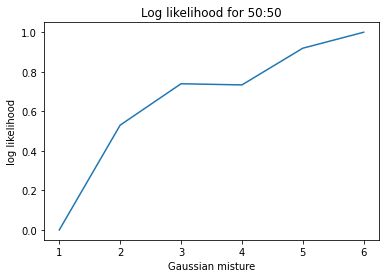

In [ ]:
train_dataset3,test_dataset3 = p4_split_dataset(p4dataset,0.5)
classes = 10
y3 = np.zeros(6)
x3 = np.array([1,2,3,4,5,6])
for number_of_Gaussian in x3:
  Means3,Pi3 = p4_GMM_training(train_dataset3,5,number_of_Gaussian)
  accuracy3,confusion_matrix3 = p4_GMM_testing(test_dataset3,10,Means3,Pi3,number_of_Gaussian)
  TP3=[]
  TN3=[]
  FP3=[]
  FN3=[]
  F13=[]
  for i in range(classes):
    TP3.append(confusion_matrix3[i][i])
    TN3.append(np.sum(confusion_matrix3)-np.sum(confusion_matrix3[i,:])-np.sum(confusion_matrix3[:,i])+confusion_matrix3[i][i])
    FP3.append(np.sum(confusion_matrix3[i,:])-confusion_matrix3[i][i])
    FN3.append(np.sum(confusion_matrix3[:,i])-confusion_matrix3[i][i])
    F13.append((2*TP3[i])/(2*TP3[i] + FP3[i] + FN3[i]))
  y3[number_of_Gaussian-1] = p4_get_likelihood(train_dataset3,Means3,Pi3,number_of_Gaussian)
  print("Accuracy for ",number_of_Gaussian," mixtures is : ",accuracy3)
  print("F1 scores ",number_of_Gaussian," mixtures is : ",F13)
  print("Confusion matrix for ",number_of_Gaussian," mixtures is : ",confusion_matrix3)

y3 = (y3-np.min(y3))/(np.max(y3)-np.min(y3))
plt.plot(x3,y3) 
plt.title("Log likelihood for 50:50") 
plt.ylabel("log likelihood") 
plt.xlabel("Gaussian misture") 
plt.show()

## Model 4 - 70:30

 Again initialising dataset as X was used variable elsewhere

In [132]:
X=[]
Y = []
for i in range(classes):
  tmp = []
  for j in range(len(lst_img_clss[i])):
    x = np.ndarray.flatten(lst_img_clss[i][j])
    tmp.append(x)
  a = np.stack(tmp,axis = 0)
  X.append(a)
  Y.append(i)


In [133]:
a = X[0]
b = np.zeros((X[0].shape[0],1))
dataset = np.column_stack((a,b))
for i in range(1,classes):
  a=X[i]
  b = i*np.ones((X[i].shape[0],1))
  temp = np.column_stack((a,b))
  dataset = np.row_stack((dataset,temp))

In [134]:
dataset.shape  # Overall dataset

(60000, 785)

In [135]:
# creating training and testing dataset
count = 4200 #per class
a=X[0]
a=a[0:count,:]/255       # Normalising else exponent becomes 0
b = np.zeros((a.shape[0],1))
train_dataset = np.column_stack((a,b))
a=X[0]
a=a[count:,:]/255
b = np.zeros((a.shape[0],1))
test_dataset = np.column_stack((a,b))
for i in range(1,classes):
  a=X[i]
  a=a[0:count,:]/255
  b = i*np.ones((a.shape[0],1))
  temp = np.column_stack((a,b))
  train_dataset = np.row_stack((train_dataset,temp))
  a=X[i]
  a=a[count:,:]/255
  b = i*np.ones((a.shape[0],1))
  temp = np.column_stack((a,b))
  test_dataset = np.row_stack((test_dataset,temp))


In [136]:
train_dataset.shape

(42000, 785)

In [137]:
test_dataset.shape

(18000, 785)

In [138]:
features = train_dataset.shape[1]-1 #784

In [139]:
# Initialising features and labels from dataset
X_test = test_dataset[:,:features]
X_train = train_dataset[:,:features]
Y_train = train_dataset[:,features]
Y_test = test_dataset[:,features]

### (i) Naive Bayes

In [ ]:
classes = 10
features = train_dataset.shape[1]-1

In [ ]:
# Creating list of numpy arrays containing training datas of each class with class as index of list 
temp = train_dataset
lst = []
for i in range(classes):
  x = temp[np.where(temp[:,features]==i)] # last column is my class indexes
  x = x[:,:features]
  lst.append(x)

In [ ]:
# 10 features' mean for each classes
mean=[] 
for i in range(classes):
  a=lst[i]
  a = a.mean(axis=0)
  mean.append(a)

#### Training

In [ ]:
count = 0
for i in range(X_train.shape[0]):
  g = []  #class conditionals
  for j in range(classes):
    v = (X_train[i]-mean[j])
    v = np.power(v,2)
    k = 0.5 * np.sum(v)
    k = math.exp(-k)
    g.append(k)
  k = g.index(max(g))
  if k==int(Y_train[i]):
    count=count+1

In [ ]:
print('The training accuracy is:')
print(count*100/X_train.shape[0])

The training accuracy is:
85.09285714285714


#### Testing

In [ ]:
conf_matrix = np.zeros((classes,classes))
count = 0
for i in range(X_test.shape[0]):
  g = []  #class conditionals
  for j in range(classes):
    v = (X_test[i]-mean[j])
    v = np.power(v,2)
    k = 0.5 * np.sum(v)
    #k = math.exp(-k)
    g.append(k)
  k = g.index(min(g))
  if k==int(Y_test[i]):
    count=count+1
  v = int(Y_test[i])
  conf_matrix[v][k] += 1

In [ ]:
print('The testing accuracy is:')
print(count*100/X_test.shape[0])

The testing accuracy is:
85.89444444444445


In [ ]:
print('The confusion matrix for above testing data is:')
print(conf_matrix.astype(int))

The confusion matrix for above testing data is:
[[1595  121    0   16   23    0    2   12   22    9]
 [  30 1582    0   93   42    4    0    4   30   15]
 [  90   30 1383   95    6  120    6   66    3    1]
 [  21    2    0 1501  100    7   18  149    0    2]
 [   1    0    0    9 1740   32    0   16    0    2]
 [   1   14   26   63  116 1553    5    9    8    5]
 [   0    1    0   16   10   11 1575  183    0    4]
 [   2    1    2   68   35    4  383 1303    2    0]
 [  62    2    0    1    8   11    1    0 1647   68]
 [  20    5    0    0   67    4    6   42   74 1582]]


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [ ]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.8807288790723358, 0.8892636312535133, 0.8614138897539707, 0.8197706171490988, 0.8816822903470991, 0.8759165256627186, 0.8298208640674394, 0.7271205357142857, 0.9185722253206916, 0.9071100917431193]


### (ii) Logistic regression

In [140]:
classes = 10
features = train_dataset.shape[1] #785 after augmented data

In [141]:
tmp = np.ones((X_train.shape[0],1))  # Creating augmented data
X_train=np.column_stack((X_train,tmp))
X_train.shape

(42000, 785)

In [142]:
tmp = np.ones((X_test.shape[0],1))  # Creating augmented data
X_test=np.column_stack((X_test,tmp))
X_test.shape

(18000, 785)

#### Training

In [143]:
W=[]
for i in range(classes):
  W.append(np.ones((features,1)))

In [144]:
def calc_loss(X,W,j):
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for i in range(classes):
    e.append(math.exp(W[i].T@X))
  k = sum(e)
  for i in range(classes):
    g.append(e[i]/k)
  loss = -1*math.log(g[j])     # loss for 1 image
  for i in range(classes):
    if i!=j:
      grad.append(-g[i]*X.reshape(X.shape[0]))
    else:
      grad.append((1-g[i])*X.reshape(X.shape[0]))
  return loss,grad

In [145]:
def train_epoch1():
  final_loss = 0
  final_grad = np.zeros((features,classes))
  for i in range(X_train.shape[0]):
    loss,grad = calc_loss(X_train[i,:],W,int(Y_train[i]))
    final_loss =final_loss + loss
    final_grad = final_grad + np.stack(grad,axis = 1)
  return final_loss,final_grad

In [146]:
epochs = 50
alpha = 10
prev_loss = 0
for i in range(epochs):
  loss,grad = train_epoch1()
  for j in range(classes):
    gradient = grad[:,j].reshape(grad[:,j].shape[0],1)
    if prev_loss<loss:
      alpha = (alpha/10)
    W[j]=W[j]+alpha*gradient/np.linalg.norm(gradient)
    prev_loss = loss
  print('loss in',i,'epoch is',loss/X_train.shape[0])

loss in 0 epoch is 2.3025850929949803
loss in 1 epoch is 1.071865758449463
loss in 2 epoch is 16.049248897047185
loss in 3 epoch is 14.386238639874653
loss in 4 epoch is 12.723348115217082
loss in 5 epoch is 11.060523865763443
loss in 6 epoch is 9.397743372229446
loss in 7 epoch is 7.734995039152109
loss in 8 epoch is 6.072273212070602
loss in 9 epoch is 4.409661089131037
loss in 10 epoch is 2.752553776122961
loss in 11 epoch is 1.2636248907181071
loss in 12 epoch is 1.0794215343483649
loss in 13 epoch is 1.2396430229940538
loss in 14 epoch is 1.1314355339393503
loss in 15 epoch is 1.037452166929742
loss in 16 epoch is 0.9598955148382359
loss in 17 epoch is 0.9008290163810643
loss in 18 epoch is 0.8578639628916568
loss in 19 epoch is 0.8293321776342419
loss in 20 epoch is 0.8161993661029197
loss in 21 epoch is 0.8111585573703298
loss in 22 epoch is 0.8095078461070596
loss in 23 epoch is 0.8069885248653499
loss in 24 epoch is 0.8051484163685908
loss in 25 epoch is 0.8028035840250733
los

In [147]:
print('Empirical risk on training data is:')
print(loss/X_train.shape[0])

Empirical risk on training data is:
0.755659734141405


#### Testing

In [149]:
conf_matrix = np.zeros((classes,classes))
count = 0
loss = 0
for i in range(X_test.shape[0]):
  X = X_test[i,:]
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for j in range(classes):
    e.append(math.exp(W[j].T@X))
  k = sum(e)
  for j in range(classes):
    g.append(e[j]/k)
  k = g.index(max(g))
  if k==Y_test[i]:
    count = count+1
  v = int(Y_test[i])
  conf_matrix[v][k] += 1

  loss = loss - 1*math.log(g[v])

In [150]:
print('The testing accuracy is:')
print(count*100/X_test.shape[0])

The testing accuracy is:
87.85555555555555


In [151]:
print('Empirical risk on testing data is:')
print(loss/X_test.shape[0])

Empirical risk on testing data is:
0.7132953150682471


In [152]:
print('The confusion matrix for above testing data is:')
print(conf_matrix.astype(int))

The confusion matrix for above testing data is:
[[1571  149    0   15   22    0    3    2   33    5]
 [  13 1654    0   61   34    4    1    1   21   11]
 [  80   27 1543   66    4   48   10   16    5    1]
 [  21    4    0 1571  103    6   18   75    0    2]
 [   1    0    0    9 1754   24    1    6    3    2]
 [   0   25   37   60  124 1524    8    4   14    4]
 [   0    1    1   16   15    8 1640  114    0    5]
 [   2    1    5  124   34    4  380 1248    2    0]
 [  20    1    0    0    7    4    2    0 1734   32]
 [  16    6    0    0   72    1    5   31   94 1575]]


In [153]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [154]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.8916004540295119, 0.9018538713195202, 0.9113998818665091, 0.8441698011821601, 0.8838498362307886, 0.8904469763365469, 0.8479834539813857, 0.7570518653321201, 0.9357798165137615, 0.9164969450101833]


### (iii) GMM

Accuracy for  1  mixtures is :  0.8497222222222223
F1 scores  1  mixtures is :  [0.8358294930875576, 0.8908538270240398, 0.9276470588235294, 0.819369715603382, 0.8727552591072345, 0.8919683257918553, 0.7972862957937584, 0.6898839137645107, 0.8829663962920047, 0.8996195493122622]
Confusion matrix for  1  mixtures is :  [[1451.   42.   58.   19.    3.    0.    3.   10.   76.   27.]
 [ 117. 1612.   12.    2.    0.    9.    1.    1.   33.    3.]
 [   0.    0. 1577.    0.    0.   18.    1.    1.    0.    0.]
 [  72.   98.   34. 1599.   18.   83.   19.  112.   30.    7.]
 [  41.   23.    3.   72. 1701.   77.   10.   74.   45.   81.]
 [   0.    4.   61.   25.   31. 1577.   15.    3.   27.    9.]
 [   3.    0.    2.   15.    1.    2. 1469.  382.    6.    4.]
 [  19.    6.   55.   99.   11.    9.  281. 1248.    5.   51.]
 [  59.   13.    1.    0.    2.    7.    0.    1. 1524.   48.]
 [  21.   31.    0.    0.    4.    2.    2.    2.   51. 1537.]]
Accuracy for  2  mixtures is :  0.864555555555555

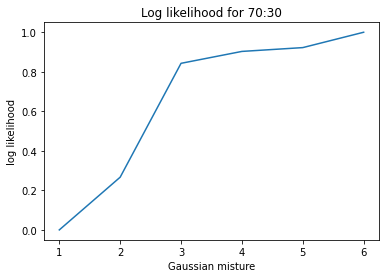

In [ ]:
train_dataset4,test_dataset4 = p4_split_dataset(p4dataset,0.7)
classes = 10
y4 = np.zeros(6)
x4 = np.array([1,2,3,4,5,6])
for number_of_Gaussian in x4:
  Means4,Pi4 = p4_GMM_training(train_dataset4,5,number_of_Gaussian)
  accuracy4,confusion_matrix4 = p4_GMM_testing(test_dataset4,10,Means4,Pi4,number_of_Gaussian)
  TP4=[]
  TN4=[]
  FP4=[]
  FN4=[]
  F14=[]
  for i in range(classes):
    TP4.append(confusion_matrix4[i][i])
    TN4.append(np.sum(confusion_matrix4)-np.sum(confusion_matrix4[i,:])-np.sum(confusion_matrix4[:,i])+confusion_matrix4[i][i])
    FP4.append(np.sum(confusion_matrix4[i,:])-confusion_matrix4[i][i])
    FN4.append(np.sum(confusion_matrix4[:,i])-confusion_matrix4[i][i])
    F14.append((2*TP4[i])/(2*TP4[i] + FP4[i] + FN4[i]))
  y4[number_of_Gaussian-1] = p4_get_likelihood(train_dataset4,Means4,Pi4,number_of_Gaussian)
  print("Accuracy for ",number_of_Gaussian," mixtures is : ",accuracy4)
  print("F1 scores ",number_of_Gaussian," mixtures is : ",F14)
  print("Confusion matrix for ",number_of_Gaussian," mixtures is : ",confusion_matrix4)

y4 = (y4-np.min(y4))/(np.max(y4)-np.min(y4))
plt.plot(x4,y4) 
plt.title("Log likelihood for 70:30") 
plt.ylabel("log likelihood") 
plt.xlabel("Gaussian misture") 
plt.show()

## Model 5 - 90:10

 Again initialising dataset as X was used variable elsewhere

In [155]:
X=[]
Y = []
for i in range(classes):
  tmp = []
  for j in range(len(lst_img_clss[i])):
    x = np.ndarray.flatten(lst_img_clss[i][j])
    tmp.append(x)
  a = np.stack(tmp,axis = 0)
  X.append(a)
  Y.append(i)


In [156]:
a = X[0]
b = np.zeros((X[0].shape[0],1))
dataset = np.column_stack((a,b))
for i in range(1,classes):
  a=X[i]
  b = i*np.ones((X[i].shape[0],1))
  temp = np.column_stack((a,b))
  dataset = np.row_stack((dataset,temp))

In [157]:
dataset.shape  # Overall dataset

(60000, 785)

In [158]:
# creating training and testing dataset
count = 5400 #per class
a=X[0]
a=a[0:count,:]/255       # Normalising else exponent becomes 0
b = np.zeros((a.shape[0],1))
train_dataset = np.column_stack((a,b))
a=X[0]
a=a[count:,:]/255
b = np.zeros((a.shape[0],1))
test_dataset = np.column_stack((a,b))
for i in range(1,classes):
  a=X[i]
  a=a[0:count,:]/255
  b = i*np.ones((a.shape[0],1))
  temp = np.column_stack((a,b))
  train_dataset = np.row_stack((train_dataset,temp))
  a=X[i]
  a=a[count:,:]/255
  b = i*np.ones((a.shape[0],1))
  temp = np.column_stack((a,b))
  test_dataset = np.row_stack((test_dataset,temp))


In [159]:
train_dataset.shape

(54000, 785)

In [160]:
test_dataset.shape

(6000, 785)

In [161]:
features = train_dataset.shape[1]-1 #784

In [162]:
# Initialising features and labels from dataset
X_test = test_dataset[:,:features]
X_train = train_dataset[:,:features]
Y_train = train_dataset[:,features]
Y_test = test_dataset[:,features]

### (i) Naive Bayes

In [19]:
classes = 10
features = train_dataset.shape[1]-1

In [20]:
# Creating list of numpy arrays containing training datas of each class with class as index of list 
temp = train_dataset
lst = []
for i in range(classes):
  x = temp[np.where(temp[:,features]==i)] # last column is my class indexes
  x = x[:,:features]
  lst.append(x)

In [21]:
# 10 features' mean for each classes
mean=[] 
for i in range(classes):
  a=lst[i]
  a = a.mean(axis=0)
  mean.append(a)

#### Training

In [24]:
count = 0
for i in range(X_train.shape[0]):
  g = []  #class conditionals
  for j in range(classes):
    v = (X_train[i]-mean[j])
    v = np.power(v,2)
    k = 0.5 * np.sum(v)
    k = math.exp(-k)
    g.append(k)
  k = g.index(max(g))
  if k==int(Y_train[i]):
    count=count+1

In [25]:
print('The training accuracy is:')
print(count*100/X_train.shape[0])

The training accuracy is:
85.88518518518518


#### Testing

In [26]:
conf_matrix = np.zeros((classes,classes))
count = 0
for i in range(X_test.shape[0]):
  g = []  #class conditionals
  for j in range(classes):
    v = (X_test[i]-mean[j])
    v = np.power(v,2)
    k = 0.5 * np.sum(v)
    #k = math.exp(-k)
    g.append(k)
  k = g.index(min(g))
  if k==int(Y_test[i]):
    count=count+1
  v = int(Y_test[i])
  conf_matrix[v][k] += 1

In [27]:
print('The testing accuracy is:')
print(count*100/X_test.shape[0])

The testing accuracy is:
81.7


In [28]:
print('The confusion matrix for above testing data is:')
print(conf_matrix.astype(int))

The confusion matrix for above testing data is:
[[490  69   0   5   6   0   1   8  17   4]
 [  4 566   0   9   1   1   0   1  12   6]
 [ 28  24 416  45   0  45   4  38   0   0]
 [ 10   2   0 465  57   2   2  61   0   1]
 [  1   0   0   2 571  17   0   9   0   0]
 [  0   0   7  20  46 519   0   3   3   2]
 [  0   1   0  17   6   1 478  94   0   3]
 [  0   0   0  22  19   2 173 382   2   0]
 [ 10   3   0   0   3  11   0   0 533  40]
 [ 15   1   0   0  37   3   4  30  28 482]]


In [29]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [30]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.846286701208981, 0.8941548183254344, 0.8132942326490714, 0.7848101265822784, 0.8484398216939079, 0.8642797668609492, 0.757527733755943, 0.6231647634584013, 0.8920502092050209, 0.8471001757469244]


### (ii) Logistic regression

In [163]:
classes = 10
features = train_dataset.shape[1] #785 after augmented data

In [164]:
tmp = np.ones((X_train.shape[0],1))  # Creating augmented data
X_train=np.column_stack((X_train,tmp))
X_train.shape

(54000, 785)

In [165]:
tmp = np.ones((X_test.shape[0],1))  # Creating augmented data
X_test=np.column_stack((X_test,tmp))
X_test.shape

(6000, 785)

#### Training

In [166]:
W=[]
for i in range(classes):
  W.append(np.ones((features,1)))

In [167]:
def calc_loss(X,W,j):
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for i in range(classes):
    e.append(math.exp(W[i].T@X))
  k = sum(e)
  for i in range(classes):
    g.append(e[i]/k)
  loss = -1*math.log(g[j])     # loss for 1 image
  for i in range(classes):
    if i!=j:
      grad.append(-g[i]*X.reshape(X.shape[0]))
    else:
      grad.append((1-g[i])*X.reshape(X.shape[0]))
  return loss,grad

In [168]:
def train_epoch1():
  final_loss = 0
  final_grad = np.zeros((features,classes))
  for i in range(X_train.shape[0]):
    loss,grad = calc_loss(X_train[i,:],W,int(Y_train[i]))
    final_loss =final_loss + loss
    final_grad = final_grad + np.stack(grad,axis = 1)
  return final_loss,final_grad

In [169]:
epochs = 50
alpha = 10
prev_loss = 0
for i in range(epochs):
  loss,grad = train_epoch1()
  for j in range(classes):
    gradient = grad[:,j].reshape(grad[:,j].shape[0],1)
    if prev_loss<loss:
      alpha = (alpha/10)
    W[j]=W[j]+alpha*gradient/np.linalg.norm(gradient)
    prev_loss = loss
  print('loss in',i,'epoch is',loss/X_train.shape[0])

loss in 0 epoch is 2.3025850929958565
loss in 1 epoch is 1.046997180890223
loss in 2 epoch is 15.488642458559163
loss in 3 epoch is 13.825570754721602
loss in 4 epoch is 12.162528163062184
loss in 5 epoch is 10.499509558276404
loss in 6 epoch is 8.836511356297361
loss in 7 epoch is 7.173535304698296
loss in 8 epoch is 5.510869779423009
loss in 9 epoch is 3.8624139755919167
loss in 10 epoch is 2.380238697333797
loss in 11 epoch is 1.7014047129567118
loss in 12 epoch is 1.1453000149743842
loss in 13 epoch is 1.2053680262847999
loss in 14 epoch is 1.0797294818811412
loss in 15 epoch is 0.9787410076493857
loss in 16 epoch is 0.8979902733571327
loss in 17 epoch is 0.8386041381256321
loss in 18 epoch is 0.7981186300830246
loss in 19 epoch is 0.7755251214921361
loss in 20 epoch is 0.7656654863493966
loss in 21 epoch is 0.7623267738694184
loss in 22 epoch is 0.7597370468391543
loss in 23 epoch is 0.7578245333770787
loss in 24 epoch is 0.7555494204358351
loss in 25 epoch is 0.7535475672302433
l

In [170]:
print('Empirical risk on training data is:')
print(loss/X_train.shape[0])

Empirical risk on training data is:
0.7070678878001663


#### Testing

In [171]:
conf_matrix = np.zeros((classes,classes))
count = 0
loss = 0
for i in range(X_test.shape[0]):
  X = X_test[i,:]
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for j in range(classes):
    e.append(math.exp(W[j].T@X))
  k = sum(e)
  for j in range(classes):
    g.append(e[j]/k)
  k = g.index(max(g))
  if k==Y_test[i]:
    count = count+1
  v = int(Y_test[i])
  conf_matrix[v][k] += 1

  loss = loss - 1*math.log(g[v])

In [172]:
print('The testing accuracy is:')
print(count*100/X_test.shape[0])

The testing accuracy is:
84.38333333333334


In [173]:
print('Empirical risk on testing data is:')
print(loss/X_test.shape[0])

Empirical risk on testing data is:
0.798063932109958


In [174]:
print('The confusion matrix for above testing data is:')
print(conf_matrix.astype(int))

The confusion matrix for above testing data is:
[[504  63   0   2   6   0   1   0  20   4]
 [  5 568   0   7   1   1   0   0  12   6]
 [ 31  13 494  35   0  18   5   4   0   0]
 [ 16   1   0 492  57   2   3  28   0   1]
 [  1   0   0   2 576  16   0   4   1   0]
 [  0   0   9  22  51 509   1   1   5   2]
 [  0   1   0  17  11   0 517  50   0   4]
 [  0   0   0  35  21   1 178 363   2   0]
 [  8   0   0   0   2   4   1   0 562  23]
 [ 19   0   0   0  36   1   5  21  40 478]]


In [175]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [176]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.8513513513513513, 0.9117174959871589, 0.8957388939256573, 0.8118811881188119, 0.8464364437913299, 0.8836805555555556, 0.7887109077040427, 0.6778711484593838, 0.9049919484702094, 0.855098389982111]


### (iii) GMM

Accuracy for  1  mixtures is :  0.8603333333333333
F1 scores  1  mixtures is :  [0.8661679135494597, 0.8970358814352574, 0.9285014691478942, 0.8397435897435898, 0.8736303871439006, 0.9014821272885789, 0.8081967213114755, 0.7073578595317725, 0.8850987432675045, 0.9066666666666666]
Confusion matrix for  1  mixtures is :  [[521.   9.  14.   4.   1.   0.   1.   1.  21.   4.]
 [ 42. 575.   7.   1.   1.   3.   0.   1.  11.   1.]
 [  0.   0. 474.   0.   0.   7.   0.   0.   1.   0.]
 [ 20.  24.  12. 524.   7.  22.   5.  46.   5.   5.]
 [ 13.  12.   0.  20. 598.  28.   6.  19.  18.  30.]
 [  0.   4.  13.   6.   6. 517.   3.   2.  11.   2.]
 [  1.   0.   2.   2.   0.   0. 493. 112.   2.   1.]
 [  9.   0.  16.  21.   6.   3.  99. 423.   0.  14.]
 [ 17.   5.   1.   0.   1.   2.   0.   0. 493.  13.]
 [  4.  11.   0.   0.   5.   1.   0.   1.  20. 544.]]
Accuracy for  2  mixtures is :  0.8911666666666667
F1 scores  2  mixtures is :  [0.8948247078464107, 0.9204097714736013, 0.9685414680648237, 0.86949

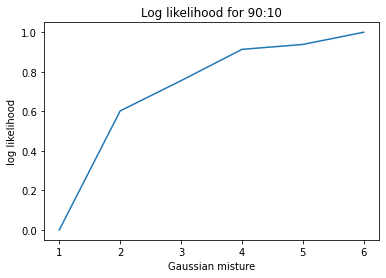

In [ ]:
train_dataset5,test_dataset5 = p4_split_dataset(p4dataset,0.9)
y5 = np.zeros(6)
x5 = np.array([1,2,3,4,5,6])
for number_of_Gaussian in x5:
  Means5,Pi5 = p4_GMM_training(train_dataset5,5,number_of_Gaussian)
  accuracy5,confusion_matrix5 = p4_GMM_testing(test_dataset5,10,Means5,Pi5,number_of_Gaussian)
  TP5=[]
  TN5=[]
  FP5=[]
  FN5=[]
  F15=[]
  for i in range(classes):
    TP5.append(confusion_matrix5[i][i])
    TN5.append(np.sum(confusion_matrix5)-np.sum(confusion_matrix5[i,:])-np.sum(confusion_matrix5[:,i])+confusion_matrix5[i][i])
    FP5.append(np.sum(confusion_matrix5[i,:])-confusion_matrix5[i][i])
    FN5.append(np.sum(confusion_matrix5[:,i])-confusion_matrix5[i][i])
    F15.append((2*TP5[i])/(2*TP5[i] + FP5[i] + FN5[i]))
  y5[number_of_Gaussian-1] = p4_get_likelihood(train_dataset5,Means5,Pi5,number_of_Gaussian)
  print("Accuracy for ",number_of_Gaussian," mixtures is : ",accuracy5)
  print("F1 scores ",number_of_Gaussian," mixtures is : ",F15)
  print("Confusion matrix for ",number_of_Gaussian," mixtures is : ",confusion_matrix5)

y5 = (y5-np.min(y5))/(np.max(y5)-np.min(y5))
plt.plot(x5,y5) 
plt.title("Log likelihood for 90:10") 
plt.ylabel("log likelihood") 
plt.xlabel("Gaussian misture") 
plt.show()

## Likelihood curve for EM for various models

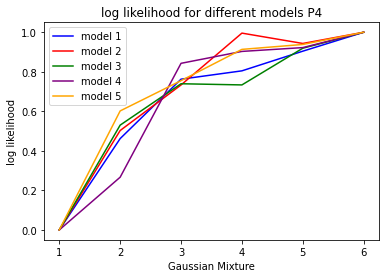

In [ ]:
fig, ax = plt.subplots()
x=x1
# Plot each dataset in its own subplot
ax.plot(x, y1, color='blue',label = 'model 1')
ax.plot(x, y2, color='red',label = 'model 2')
ax.plot(x, y3, color='green',label = 'model 3')
ax.plot(x, y4, color='purple',label = 'model 4')
ax.plot(x, y5, color='orange',label = 'model 5')

ax.set_xlabel('Gaussian Mixture')
ax.set_ylabel('log likelihood')
ax.set_title('log likelihood for different models P4')
ax.legend()
plt.show()

## ROC curve for different models

In [581]:
# Converting to required dataset format
req_dtst = dataset[:,:-1]/255
y = dataset[:,-1]
y=y.astype(int)
req_dtst = np.column_stack((y,req_dtst,))
req_dtst

array([[0., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       ...,
       [9., 1., 1., ..., 1., 1., 1.],
       [9., 1., 1., ..., 1., 1., 1.],
       [9., 1., 1., ..., 1., 1., 1.]])

In [601]:
def ROC_curve(count):
  classes = 2
  # creating training datas for different class
  temp = req_dtst[0:count,:]
  lst = []
  ans = []
  for i in range(classes):
    x1 = temp[np.where(temp[:,0]==i)]
    x = x1[:,1:]
    y = x1[:,0]
    y=y.reshape((y.shape[0],1))
    lst.append(x)
    ans.append(y)
  l = np.row_stack((lst[0],lst[1]))
  m = np.row_stack((ans[0],ans[1]))
  mean=[]   # 10 features' mean for each classes
  for i in range(classes):
    a=lst[i]
    a = a.mean(axis=0)
    mean.append(a)
  TPR=[]
  FPR=[]
  for j in range(10):
    threshold=(j-5)/100
    TP=0
    FP=0
    TN=0
    FN=0
    for i in range(l.shape[0]):
      v = (l[i]-mean[0])
      v = np.power(v,2)
      k = 0.5 * np.sum(v)
      k1 = math.exp(-k)
      v = (l[i]-mean[1])
      v = np.power(v,2)
      k = 0.5 * np.sum(v)
      k2 = math.exp(-k)
      if k1-k2>threshold:
        k=1
      else:
        k=0
      if k==int(m[i][0]) and k==1:
        TP+=1
      elif k==int(m[i][0]) and k==0:
        TN+=1
      elif k!=int(m[i][0]) and k==1:
        FP+=1
      else:
        FN+=1
      # print(TP)
      # print(TN)
      # print(FP)
      # print(FN)
    TPR.append(TP/(TP+FN))
    FPR.append(FP/(FP+TN))
  plt.plot(TPR,FPR)
  return TPR,FPR

In [ ]:
x1,y1 = ROC_curve(12000) # model 1 20:80

In [584]:
x2,y2=ROC_curve(18000) # model 1 30:70

In [585]:
x3,y3=ROC_curve(30000) # model 1 50:50

In [586]:
x4,y4=ROC_curve(42000) # model 1 70:30

In [587]:
x5,y5=ROC_curve(54000) # model 1 90:10

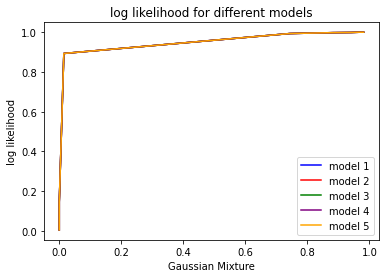

In [588]:
fig, ax = plt.subplots()
# Plot each dataset in its own subplot
ax.plot(x1, y1, color='blue',label = 'model 1')
ax.plot(x1, y2, color='red',label = 'model 2')
ax.plot(x1, y3, color='green',label = 'model 3')
ax.plot(x1, y4, color='purple',label = 'model 4')
ax.plot(x1, y5, color='orange',label = 'model 5')

ax.set_xlabel('Gaussian Mixture')
ax.set_ylabel('log likelihood')
ax.set_title('log likelihood for different models')
ax.legend()
plt.show()

# Q5

## Importing data

In [428]:
import math

In [429]:
#below where the file is in gdrive, change with your
data_path = "/content/drive/MyDrive/Prnn/"
dataset = np.loadtxt(data_path + 'PCA_MNIST.csv', delimiter=',',skiprows=1)

In [430]:
dataset.shape

(60000, 11)

In [431]:
# Normalising dataset needed to prevent exponent going to zero
for i in range(1,dataset.shape[1]):
  dataset[:,i] = (dataset[:,i]-dataset[:,i].min())/(dataset[:,i].max()-dataset[:,i].min())

In [432]:
#dataset[:,4].min()

## Data prep and functions for GMM

In [433]:
def p5_split_dataset(dataset,train_ratio):
  classes = np.unique(dataset[:,-1])
  dataset_size = dataset.shape[0]
  count = int(train_ratio*(dataset_size))

  np.random.shuffle(dataset)
  train_dataset, test_dataset = dataset[:count,:], dataset[count:,:]

  return train_dataset,test_dataset

In [434]:
def p5_normalize_data(dataset):
  row_Max = np.amax(dataset[:,:-1], axis=0)
  row_Min = np.amin(dataset[:,:-1], axis=0)
  dataset = np.c_[(dataset[:,:-1]-row_Min)/(row_Max-row_Min),dataset[:,-1]]
  return dataset

In [435]:
def p5_GMM_training(train_dataset,epochs,number_of_Gaussian):
  min_class = int(np.min(train_dataset[:,-1]))
  classes = int(len(np.unique(train_dataset[:,-1])))
  dimension = train_dataset.shape[1]-1
  Const = 1/np.power(2*math.pi,dimension/2)


  Category_wise_train_data = []
  for i in range(classes):
    Category_wise_train_data.append(train_dataset[train_dataset[:,-1]==(i+min_class)][:,:-1])
  
  Means = []
  Variance = []
  Pi = []
    
  for digit_class in range(classes): 
    Category_wise_epochs = 0
    Category_wise_Means = np.random.uniform(0, 1,(dimension,number_of_Gaussian)) #np.zeros((dimension,number_of_Gaussian))
    Category_wise_Variance = np.identity(dimension)
    Category_wise_Variance = np.dstack([Category_wise_Variance]*number_of_Gaussian)

    Category_wise_Pi = np.ones(number_of_Gaussian)/number_of_Gaussian
        
    
    for Category_wise_epochs in range(epochs):
        # Calculating inverse of co-variance matrix
        Category_wise_Variance_inverse = np.identity(dimension)
        Category_wise_Variance_inverse = np.dstack([Category_wise_Variance_inverse]*number_of_Gaussian)

        for i in range(number_of_Gaussian):
            Category_wise_Variance_inverse[:,:,i] = np.linalg.inv(Category_wise_Variance[:,:,i])


        # calculating determinant
        Category_wise_Variance_det = np.zeros(number_of_Gaussian)

        for i in range(number_of_Gaussian):
            Category_wise_Variance_det[i] = np.linalg.det(Category_wise_Variance[:,:,i])
            
        
        Category_wise_Gamma = np.zeros((Category_wise_train_data[digit_class].shape[0],number_of_Gaussian))
        
        
        
        data_point_number = 0
        #Calculating Gamma for each datapoint and each class
        for data_point in Category_wise_train_data[digit_class]:
            Denominator = 0.0
            for k in range(number_of_Gaussian):
                temp1 = data_point-Category_wise_Means[:,k]
                temp2 = Category_wise_Variance_inverse[:,:,k]
                temp3 = (-1/2)*(temp1.T @ temp2 @ temp1)
                temp4 = np.exp(max(-20,temp3))
                temp5 = np.power(Category_wise_Variance_det[k],-0.5)*temp4*Category_wise_Pi[k]
                Denominator += temp5

            Gamma_each_Gaussian = np.zeros(number_of_Gaussian)
            for k in range(number_of_Gaussian):
                temp6 = data_point-Category_wise_Means[:,k]

                temp7 = Category_wise_Variance_inverse[:,:,k]
                temp8 = (-1/2)*(temp6.T @ temp7 @ temp6)

                temp9 = np.exp(max(-20,temp8))
                Numerator = np.power(Category_wise_Variance_det[k],-0.5)*temp9*Category_wise_Pi[k]

                Gamma_each_Gaussian[k] = (Numerator/Denominator)

            Category_wise_Gamma[data_point_number,:] = Gamma_each_Gaussian
            
            data_point_number += 1
            

        
        # Updating mean
        
        for k in range(number_of_Gaussian):
            meank = np.zeros(dimension)
            data_point_number = 0
            #updating mean in one line
            Category_wise_Means[:,k] = np.average(Category_wise_train_data[digit_class],axis = 0, weights=Category_wise_Gamma[:,k])
        

        
        Nk = np.sum(Category_wise_Gamma,axis = 0)

        for k in range(number_of_Gaussian):
            variancek = np.zeros((dimension,dimension))
            count = 0
            data_point_number = 0
            for data_point in Category_wise_train_data[digit_class]:
                v = data_point-Category_wise_Means[:,k]
                x = (v).reshape(v.shape[0],1)

                variancek = variancek + (x @ x.T ) * Category_wise_Gamma[data_point_number,k]
                data_point_number += 1
                
            Category_wise_Variance[:,:,k] = variancek/Nk[k]
        
        # Updating Pi
        
        
        Category_wise_Pi = Nk/Category_wise_train_data[digit_class].shape[0]
        
    Means.append(Category_wise_Means)
    Variance.append(Category_wise_Variance)
    Pi.append(Category_wise_Pi)
  return Means,Variance,Pi


In [436]:
def p5_GMM_testing(test_dataset,classes,Means,Variance,Pi,number_of_Gaussian):
  min_class = int(np.min(test_dataset[:,-1]))
  dimension = test_dataset.shape[1]-1
  Variance_inverse = []
  # Calculating inverse of co-variance matrix
  for i in range(len(Variance)):
      
      Category_wise_Variance = Variance[i]
      
      Category_wise_Variance_inverse = np.identity(dimension)
      Category_wise_Variance_inverse = np.dstack([Category_wise_Variance_inverse]*number_of_Gaussian)
      
      for k in range(number_of_Gaussian):
          Category_wise_Variance_inverse[:,:,k] = np.linalg.inv(Category_wise_Variance[:,:,k])
      
      Variance_inverse.append(Category_wise_Variance_inverse)

  # Variance determinant
  Variance_det = []

  for i in range(len(Variance)):
      
      Category_wise_Variance = Variance[i]
      
      Category_wise_Variance_det = np.zeros(number_of_Gaussian)
      
      for k in range(number_of_Gaussian):
          Category_wise_Variance_det[k] = np.linalg.det(Category_wise_Variance[:,:,k])
      Variance_det.append(Category_wise_Variance_det)


  confusion_matrix = np.zeros((classes,classes))
  correct_predicted_labels = 0
  for data_point in test_dataset:
    probabilities = np.zeros(classes)

    for Class in range(classes):
      Inner_summation = 0.0

      for k in range(number_of_Gaussian):
        temp1 = data_point[:-1]-Means[Class][:,k]
        temp1 = (temp1).reshape(temp1.shape[0],1)
        temp2 = Variance_inverse[Class][:,:,k]
        temp3 = (-1/2)*(temp1.T @ temp2 @ temp1)
        temp4 = np.exp(temp3)
        temp5 = np.power(Variance_det[Class][k],-0.5)*temp4*Pi[Class][k]
        Inner_summation += temp5
      probabilities[Class] = Inner_summation
      
    predicted_class = np.argmax(probabilities) + min_class
    confusion_matrix[predicted_class][int(data_point[-1])] += 1
    if(predicted_class==data_point[-1:]):
      correct_predicted_labels += 1


  accuracy = correct_predicted_labels/test_dataset.shape[0]

  return accuracy,confusion_matrix

In [437]:
def p5_get_likelihood(dataset,Means,Variance,Pi,number_of_Gaussian):
  min_class = int(np.min(dataset[:,-1]))
  dimension = dataset.shape[1]-1
  Variance_inverse = []
  # Calculating inverse of co-variance matrix
  for i in range(len(Variance)):
      
      Category_wise_Variance = Variance[i]
      
      Category_wise_Variance_inverse = np.identity(dimension)
      Category_wise_Variance_inverse = np.dstack([Category_wise_Variance_inverse]*number_of_Gaussian)
      
      for k in range(number_of_Gaussian):
          Category_wise_Variance_inverse[:,:,k] = np.linalg.inv(Category_wise_Variance[:,:,k])
      
      Variance_inverse.append(Category_wise_Variance_inverse)

  # Variance determinant
  Variance_det = []

  for i in range(len(Variance)):
      
      Category_wise_Variance = Variance[i]
      
      Category_wise_Variance_det = np.zeros(number_of_Gaussian)
      
      for k in range(number_of_Gaussian):
          Category_wise_Variance_det[k] = np.linalg.det(Category_wise_Variance[:,:,k])
      Variance_det.append(Category_wise_Variance_det)

  log_likelihood = 0.0
  data_point_number = 0
  
  for data_point in dataset:
      Inner_summation = 0.0
      for k in range(number_of_Gaussian):
          temp1 = data_point[:-1]-Means[int(data_point[-1])-min_class][:,k]
          temp1 = (temp1).reshape(temp1.shape[0],1)
          temp2 = Variance_inverse[int(data_point[-1])-min_class][:,:,k]
          temp3 = (-1/2)*(temp1.T @ temp2 @ temp1)
          temp4 = np.exp(temp3)
          temp5 = np.power(Variance_det[int(data_point[-1])-min_class][k],-0.5)*temp4*Pi[int(data_point[-1])-min_class][k]
          Inner_summation += temp5
          
      log_likelihood += np.log(Inner_summation)
          
      data_point_number += 1
  
  return log_likelihood

## Model 1 - 20:80

In [438]:
count = 12000

In [439]:
X_train = dataset[0:count,1:]

In [440]:
Y_train =dataset[0:count,0]

In [441]:
X_test = dataset[count:,1:]

In [442]:
Y_test = dataset[count:,0]

In [443]:
X_test.shape

(48000, 10)

### (i) Bayes Classifier

In [444]:
classes = 10

In [445]:
# creating training datas for different class
temp = dataset[0:count,:]
lst = []
for i in range(classes):
  x = temp[np.where(temp[:,0]==i)]
  x = x[:,1:]
  lst.append(x)

In [446]:
mean=[]   # 10 features' mean for each classes
for i in range(classes):
  a=lst[i]
  a = a.mean(axis=0)
  mean.append(a)

#### Training

In [447]:
count = 0
for i in range(X_train.shape[0]):
  g = []  #class conditionals
  for j in range(classes):
    v = (X_train[i]-mean[j])
    v = np.power(v,2)
    k = 0.5 * np.sum(v)
    k = math.exp(-k)
    g.append(k)
  k = g.index(max(g))
  if k==int(Y_train[i]):
    count=count+1

In [448]:
print('Train accuracy is:')
print(count*100/X_train.shape[0])

Train accuracy is:
82.45


#### Testing

In [449]:
conf_matrix = np.zeros((classes,classes))
count = 0
for i in range(X_test.shape[0]):
  g = []  #class conditionals
  for j in range(classes):
    v = (X_test[i]-mean[j])
    v = np.power(v,2)
    k = 0.5 * np.sum(v)
    k = math.exp(-k)
    g.append(k)
  k = g.index(max(g))
  if k==int(Y_test[i]):
    count=count+1
  v = int(Y_test[i])
  conf_matrix[v][k] += 1

In [450]:
print('Test accuracy is:')
print(count*100/X_test.shape[0])

Test accuracy is:
82.2375


In [451]:
print('The confusion matrix for above testing data is:')
print(conf_matrix.astype(int))

The confusion matrix for above testing data is:
[[3893  311   16  362   16    4    6   18  112   62]
 [ 157 3989    2  506   15   27    1    0   18   85]
 [  37   39 3960  190    4  545    1   21    1    2]
 [  25    0   17 4220   42  131  106  258    1    0]
 [   0    1    2  239 4420  107    0    2    1   28]
 [   0   15   90  165  146 4339   17   18    9    1]
 [   3    1    0   46   13   15 3943  777    0    2]
 [   9    2   11  541   92   17 1519 2606    0    3]
 [ 267   35    8  261   77   50   17    9 3966  110]
 [  84   19    3  148  210   17   12   69  100 4138]]


In [452]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [453]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.8394609164420486, 0.8660442900564481, 0.888988663149624, 0.7353197421153511, 0.8988307066598882, 0.8633107839235973, 0.7566685856841298, 0.6076008393564933, 0.8805506216696269, 0.8965442530603401]


### (ii) Logistic regression

In [454]:
# Run this only once
tmp = np.ones((X_train.shape[0],1))  # Creating augmented data
X_train=np.column_stack((X_train,tmp))
X_train.shape

(12000, 11)

In [455]:
# Run this only once
tmp = np.ones((X_test.shape[0],1))  # Creating augmented data
X_test=np.column_stack((X_test,tmp))
X_test.shape

(48000, 11)

#### Training

In [456]:
classes = 10

In [457]:
W=[]
for i in range(10):
  W.append(np.ones((11,1))/11)

In [458]:
def calc_loss(X,W,j):
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for i in range(classes):
    e.append(math.exp(W[i].T@X))
  k = sum(e)
  for i in range(classes):
    g.append(e[i]/k)
  loss = -1*math.log(g[j])     # loss for 1 image
  for i in range(classes):
    if i!=j:
      grad.append(-g[i]*X.reshape(X.shape[0]))
    else:
      grad.append((1-g[i])*X.reshape(X.shape[0]))
  return loss,grad

In [459]:
def train_epoch1():
  final_loss = 0
  final_grad = np.zeros((11,classes))
  for i in range(X_train.shape[0]):
    loss,grad = calc_loss(X_train[i,:],W,int(Y_train[i]))
    final_loss =final_loss + loss
    final_grad = final_grad + np.stack(grad,axis = 1)
  return final_loss,final_grad

In [460]:
epochs = 100
alpha = 10
prev_loss = 0
for i in range(epochs):
  loss,grad = train_epoch1()
  for j in range(classes):
    gradient = grad[:,j].reshape(grad[:,j].shape[0],1)
    if prev_loss<loss:
      alpha = (alpha/10)
    W[j]=W[j]+alpha*gradient/np.linalg.norm(gradient)
    prev_loss = loss
  print('loss in',i,'epoch is',loss/X_train.shape[0])

loss in 0 epoch is 2.302585092994423
loss in 1 epoch is 2.130593598610695
loss in 2 epoch is 2.3434817993732517
loss in 3 epoch is 2.229246794007968
loss in 4 epoch is 2.126608921883459
loss in 5 epoch is 2.0384540994554485
loss in 6 epoch is 1.9672408591304527
loss in 7 epoch is 1.912120238241765
loss in 8 epoch is 1.8710408201685522
loss in 9 epoch is 1.8417181937393097
loss in 10 epoch is 1.8168435144313402
loss in 11 epoch is 1.7925311486594628
loss in 12 epoch is 1.7684778313581155
loss in 13 epoch is 1.7446912944436086
loss in 14 epoch is 1.7211745236533251
loss in 15 epoch is 1.6979298953315698
loss in 16 epoch is 1.6749596204140171
loss in 17 epoch is 1.6522657857759433
loss in 18 epoch is 1.629850355735488
loss in 19 epoch is 1.607715165792077
loss in 20 epoch is 1.5858619163670058
loss in 21 epoch is 1.564292166546598
loss in 22 epoch is 1.543007328219972
loss in 23 epoch is 1.522008660628259
loss in 24 epoch is 1.5012972653647882
loss in 25 epoch is 1.480874081879974
loss in

In [461]:
print('Empirical risk on train data is:')
print(loss/X_train.shape[0])

Empirical risk on train data is:
0.6827763078561697


#### Testing

In [462]:
conf_matrix = np.zeros((classes,classes))
count = 0
loss = 0
for i in range(X_test.shape[0]):
  X = X_test[i,:]
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for j in range(classes):
    e.append(math.exp(W[j].T@X))
  k = sum(e)
  for j in range(classes):
    g.append(e[j]/k)
  k = g.index(max(g))
  if k==Y_test[i]:
    count = count+1
  v = int(Y_test[i])
  conf_matrix[v][k] += 1

  loss = loss - 1*math.log(g[v])

In [463]:
print('Test accuracy is:')
print(count*100/X_test.shape[0])

Test accuracy is:
83.88958333333333


In [464]:
print('Empirical risk on test data is:')
print(loss/X_test.shape[0])

Empirical risk on test data is:
0.6738436141861155


In [465]:
print('The confusion matrix for above testing data is:')
print(conf_matrix.astype(int))

The confusion matrix for above testing data is:
[[4136  218    9  239    9    2    5   25   71   86]
 [ 302 3967    6  316   13   18    0    0   30  148]
 [  66   11 4300   41    2  312   17   49    0    2]
 [  38    1   49 4212   46  189   79  183    1    2]
 [   0    1    1  298 4303  123    1    1    2   70]
 [   0   11  110  137   93 4387   33    9   10   10]
 [  12    0   51   47   14   36 4051  554   33    2]
 [  23    1  115  577   78   30 1455 2516    0    5]
 [ 232   27   15  167   54   28   12    3 4148  114]
 [ 112    7    1  123  117   16   16   60  101 4247]]


In [466]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [467]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.8509412611871207, 0.877266696152145, 0.9093792957597546, 0.7688235830975632, 0.903137789904502, 0.8826073835630218, 0.7739039067723756, 0.6136585365853658, 0.902131361461505, 0.8954248366013072]


### (iii) GMM

In [ ]:
# data_path = "/content/drive/MyDrive/Prnn/"
P5dataset = np.loadtxt('/content/drive/MyDrive/Prnn/PCA_MNIST.csv', delimiter=',', skiprows=1)
# swapping column
P5dataset = np.c_[ P5dataset[:,1:], P5dataset[:,0]]
P5dataset = p5_normalize_data(P5dataset)

In [ ]:
np.set_printoptions(suppress=True)

Accuracy for  1  mixtures is :  0.9397083333333334
F1 scores  1  mixtures is :  [0.9362363919129082, 0.9568929612661391, 0.9821522864082797, 0.9246721561451662, 0.9454963908358615, 0.9533271240815482, 0.9132653061224489, 0.878618914861677, 0.9529229177444387, 0.9533502968617472]
Confusion matrix for  1  mixtures is :  [[4515.   84.   80.   46.    4.    1.    1.    9.   75.   20.]
 [ 162. 4595.    7.    5.    0.    1.    1.    9.   26.    5.]
 [   1.    5. 4650.   14.    2.   20.    3.    3.    2.    1.]
 [  48.   36.   15. 4548.   42.   70.   32.  154.   51.   23.]
 [   1.   17.    0.   37. 4519.   91.    9.   26.   10.   63.]
 [   2.    5.    7.   31.  130. 4606.   11.   18.   38.    7.]
 [   1.    0.    0.   22.    2.    2. 4475.  483.    1.   47.]
 [   4.    5.    1.   91.   13.    0.  220. 4097.    5.   64.]
 [  58.   27.    6.   22.   31.   11.    1.    6. 4605.   70.]
 [  18.   19.    2.    2.   43.    6.   14.   21.   15. 4496.]]
Accuracy for  2  mixtures is :  0.947458333333333

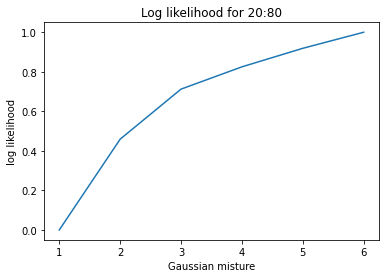

In [ ]:
train_dataset1,test_dataset1 = p5_split_dataset(P5dataset,0.2)
classes = 10
y1 = np.zeros(6)
x1 = np.array([1,2,3,4,5,6])
for number_of_Gaussian in x1:
  Means1,Variance1,Pi1 = p5_GMM_training(train_dataset1,5,number_of_Gaussian)
  accuracy1,confusion_matrix1 = p5_GMM_testing(test_dataset1,10,Means1,Variance1,Pi1,number_of_Gaussian)
  TP1=[]
  TN1=[]
  FP1=[]
  FN1=[]
  F11=[]
  for i in range(classes):
    TP1.append(confusion_matrix1[i][i])
    TN1.append(np.sum(confusion_matrix1)-np.sum(confusion_matrix1[i,:])-np.sum(confusion_matrix1[:,i])+confusion_matrix1[i][i])
    FP1.append(np.sum(confusion_matrix1[i,:])-confusion_matrix1[i][i])
    FN1.append(np.sum(confusion_matrix1[:,i])-confusion_matrix1[i][i])
    F11.append((2*TP1[i])/(2*TP1[i] + FP1[i] + FN1[i]))
  y1[number_of_Gaussian-1] = p5_get_likelihood(train_dataset1,Means1,Variance1,Pi1,number_of_Gaussian)
  print("Accuracy for ",number_of_Gaussian," mixtures is : ",accuracy1)
  print("F1 scores ",number_of_Gaussian," mixtures is : ",F11)
  print("Confusion matrix for ",number_of_Gaussian," mixtures is : ",confusion_matrix1)

y1 = (y1-np.min(y1))/(np.max(y1)-np.min(y1))
plt.plot(x1,y1) 
plt.title("Log likelihood for 20:80") 
plt.xlabel("Gaussian misture") 
plt.ylabel("log likelihood") 
plt.show()

## Model 2 - 30:70

In [202]:
count = 18000

In [203]:
X_train = dataset[0:count,1:]

In [204]:
Y_train =dataset[0:count,0]

In [205]:
X_test = dataset[count:,1:]

In [206]:
Y_test = dataset[count:,0]

In [207]:
X_test.shape

(42000, 10)

### (i) Bayes Classifier

In [ ]:
classes = 10

In [ ]:
# creating training datas for different class
temp = dataset[0:count,:]
lst = []
for i in range(classes):
  x = temp[np.where(temp[:,0]==i)]
  x = x[:,1:]
  lst.append(x)

In [ ]:
mean=[]   # 10 features' mean for each classes
for i in range(classes):
  a=lst[i]
  a = a.mean(axis=0)
  mean.append(a)

#### Training

In [ ]:
count = 0
for i in range(X_train.shape[0]):
  g = []  #class conditionals
  for j in range(classes):
    v = (X_train[i]-mean[j])
    v = np.power(v,2)
    k = 0.5 * np.sum(v)
    k = math.exp(-k)
    g.append(k)
  k = g.index(max(g))
  if k==int(Y_train[i]):
    count=count+1

In [ ]:
print('Train accuracy is:')
print(count*100/X_train.shape[0])

Train accuracy is:
81.71111111111111


#### Testing

In [ ]:
conf_matrix = np.zeros((classes,classes))
count = 0
for i in range(X_test.shape[0]):
  g = []  #class conditionals
  for j in range(classes):
    v = (X_test[i]-mean[j])
    v = np.power(v,2)
    k = 0.5 * np.sum(v)
    k = math.exp(-k)
    g.append(k)
  k = g.index(max(g))
  if k==int(Y_test[i]):
    count=count+1
  v = int(Y_test[i])
  conf_matrix[v][k] += 1

In [ ]:
print('Test accuracy is:')
print(count*100/X_test.shape[0])

Test accuracy is:
82.96428571428571


In [ ]:
print('The confusion matrix for above testing data is:')
print(conf_matrix.astype(int))

The confusion matrix for above testing data is:
[[3488  352    4  132   13    0    6   27  146   32]
 [  88 3721    1  295   16   12    1    1   16   49]
 [  72   52 3342  179    6  510    5   32    1    1]
 [  20    1   10 3589   45  102  108  324    1    0]
 [   0    1    0  157 3913   91    0   10    1   27]
 [   0   25   78  134  164 3743   23   24    6    3]
 [   2    2    1   37   14   11 3576  555    0    2]
 [   1    4    8  223   44    9 1584 2326    0    1]
 [ 226   39    3  219   37   34   18   15 3566   43]
 [  53   34    0   82  195   15   11   82  147 3581]]


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [ ]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.8559509202453988, 0.8826948167477168, 0.8740682620635544, 0.7762517573267006, 0.9050537758760264, 0.857797639509568, 0.7503147293327738, 0.6124275934702474, 0.8822365165759525, 0.9021287315782844]


### (ii) Logistic regression

In [208]:
tmp = np.ones((X_train.shape[0],1))  # Creating augmented data
X_train=np.column_stack((X_train,tmp))
X_train.shape

(18000, 11)

In [209]:
tmp = np.ones((X_test.shape[0],1))  # Creating augmented data
X_test=np.column_stack((X_test,tmp))
X_test.shape

(42000, 11)

#### Training

In [210]:
classes = 10

In [211]:
W=[]
for i in range(10):
  W.append(np.ones((11,1))/11)

In [212]:
def calc_loss(X,W,j):
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for i in range(classes):
    e.append(math.exp(W[i].T@X))
  k = sum(e)
  for i in range(classes):
    g.append(e[i]/k)
  loss = -1*math.log(g[j])     # loss for 1 image
  for i in range(classes):
    if i!=j:
      grad.append(-g[i]*X.reshape(X.shape[0]))
    else:
      grad.append((1-g[i])*X.reshape(X.shape[0]))
  return loss,grad

In [213]:
def train_epoch1():
  final_loss = 0
  final_grad = np.zeros((11,classes))
  for i in range(X_train.shape[0]):
    loss,grad = calc_loss(X_train[i,:],W,int(Y_train[i]))
    final_loss =final_loss + loss
    final_grad = final_grad + np.stack(grad,axis = 1)
  return final_loss,final_grad

In [214]:
epochs = 100
alpha = 10
prev_loss = 0
for i in range(epochs):
  loss,grad = train_epoch1()
  for j in range(classes):
    gradient = grad[:,j].reshape(grad[:,j].shape[0],1)
    if prev_loss<loss:
      alpha = (alpha/10)
    W[j]=W[j]+alpha*gradient/np.linalg.norm(gradient)
    prev_loss = loss
  print('loss in',i,'epoch is',loss/X_train.shape[0])

loss in 0 epoch is 2.302585092993949
loss in 1 epoch is 2.1252586918841327
loss in 2 epoch is 2.374025450993758
loss in 3 epoch is 2.255149426247823
loss in 4 epoch is 2.1468741114230565
loss in 5 epoch is 2.0520004966496357
loss in 6 epoch is 1.9734634303459493
loss in 7 epoch is 1.913605408152371
loss in 8 epoch is 1.872305844448855
loss in 9 epoch is 1.8433085751294547
loss in 10 epoch is 1.8184700833171181
loss in 11 epoch is 1.794028105127459
loss in 12 epoch is 1.7698562002513487
loss in 13 epoch is 1.7459581775002309
loss in 14 epoch is 1.7223367485066008
loss in 15 epoch is 1.6989944404751989
loss in 16 epoch is 1.6759336586790365
loss in 17 epoch is 1.6531566827903725
loss in 18 epoch is 1.6306656595817755
loss in 19 epoch is 1.6084625950249365
loss in 20 epoch is 1.586549346591995
loss in 21 epoch is 1.5649276160433696
loss in 22 epoch is 1.543598942605021
loss in 23 epoch is 1.5225646967248891
loss in 24 epoch is 1.5018260743676837
loss in 25 epoch is 1.4813840919528247
loss

In [215]:
print('Empirical risk on train data is:')
print(loss/X_train.shape[0])

Empirical risk on train data is:
0.7047005206089701


#### Testing

In [216]:
conf_matrix = np.zeros((classes,classes))
count = 0
loss = 0
for i in range(X_test.shape[0]):
  X = X_test[i,:]
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for j in range(classes):
    e.append(math.exp(W[j].T@X))
  k = sum(e)
  for j in range(classes):
    g.append(e[j]/k)
  k = g.index(max(g))
  if k==Y_test[i]:
    count = count+1
  v = int(Y_test[i])
  conf_matrix[v][k] += 1

  loss = loss - 1*math.log(g[v])

In [217]:
print('Test accuracy is:')
print(count*100/X_test.shape[0])

Test accuracy is:
84.69761904761904


In [218]:
print('Empirical risk on test data is:')
print(loss/X_test.shape[0])

Empirical risk on test data is:
0.670280715007923


In [219]:
print('The confusion matrix for above testing data is:')
print(conf_matrix.astype(int))

The confusion matrix for above testing data is:
[[3687  257    3   58    6    0    5   33  121   30]
 [ 185 3736    0  165   27    8    0    0   29   50]
 [  98   16 3662   32    4  298   26   63    0    1]
 [  23    1   40 3633   69  143   79  209    2    1]
 [   0    1    1  139 3911   96    0    4    6   42]
 [   0   18  105   84  154 3775   35   14   11    4]
 [   6    1   67   15   19   29 3568  426   67    2]
 [   2    1  125  280   46   18 1498 2229    0    1]
 [ 153   28    7  116   45   19    9    7 3786   30]
 [  78   18    1   66  156   13   17   68  197 3586]]


In [220]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [221]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.8745256166982922, 0.9027425395674762, 0.8919741809767385, 0.8268092853891671, 0.9056385318976496, 0.8780090708221886, 0.7561725124509908, 0.6146422170136495, 0.8993942273429149, 0.9024789228639738]


### (iii) GMM

In [ ]:
np.set_printoptions(suppress=True)

Accuracy for  1  mixtures is :  0.9401428571428572
F1 scores  1  mixtures is :  [0.9335827876520112, 0.9562329498280157, 0.9822004539481544, 0.9226558781532603, 0.9471291866028708, 0.9541912632821724, 0.9143720227721622, 0.879735196763516, 0.9545183239823326, 0.9561117156329344]
Confusion matrix for  1  mixtures is :  [[3992.   79.   75.   53.    2.    0.    1.    7.   61.   16.]
 [ 156. 4031.    5.    2.    2.    1.    1.    6.   18.    4.]
 [   0.    5. 4111.   10.    0.   20.    3.    2.    4.    2.]
 [  43.   19.   13. 3877.   41.   43.   30.  118.   46.   21.]
 [   2.   13.    0.   30. 3959.   73.    7.   25.   12.   48.]
 [   1.    6.    4.   42.  110. 4041.    8.   17.   36.    3.]
 [   3.    0.    0.   20.    2.    2. 3935.  421.    1.   42.]
 [   4.    3.    1.  102.    9.    2.  187. 3588.    8.   52.]
 [  48.   30.    5.   15.   18.   12.    1.    5. 3998.   46.]
 [  17.   19.    0.    2.   48.    8.    8.   12.   15. 3954.]]
Accuracy for  2  mixtures is :  0.945309523809523

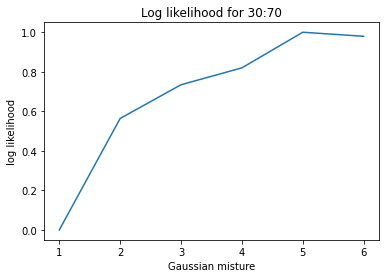

In [ ]:
train_dataset2,test_dataset2 = p5_split_dataset(P5dataset,0.3)
classes = 10
y2 = np.zeros(6)
x2 = np.array([1,2,3,4,5,6])
for number_of_Gaussian in x2:
  Means2,Variance2,Pi2 = p5_GMM_training(train_dataset2,5,number_of_Gaussian)
  accuracy2,confusion_matrix2 = p5_GMM_testing(test_dataset2,10,Means2,Variance2,Pi2,number_of_Gaussian)
  TP2=[]
  TN2=[]
  FP2=[]
  FN2=[]
  F12=[]
  for i in range(classes):
    TP2.append(confusion_matrix2[i][i])
    TN2.append(np.sum(confusion_matrix2)-np.sum(confusion_matrix2[i,:])-np.sum(confusion_matrix2[:,i])+confusion_matrix2[i][i])
    FP2.append(np.sum(confusion_matrix2[i,:])-confusion_matrix2[i][i])
    FN2.append(np.sum(confusion_matrix2[:,i])-confusion_matrix2[i][i])
    F12.append((2*TP2[i])/(2*TP2[i] + FP2[i] + FN2[i]))
  y2[number_of_Gaussian-1] = p5_get_likelihood(train_dataset2,Means2,Variance2,Pi2,number_of_Gaussian)
  print("Accuracy for ",number_of_Gaussian," mixtures is : ",accuracy2)
  print("F1 scores ",number_of_Gaussian," mixtures is : ",F12)
  print("Confusion matrix for ",number_of_Gaussian," mixtures is : ",confusion_matrix2)

y2 = (y2-np.min(y2))/(np.max(y2)-np.min(y2))
plt.plot(x2,y2) 
plt.title("Log likelihood for 30:70") 
plt.ylabel("log likelihood") 
plt.xlabel("Gaussian misture") 
plt.show()

## Model 3 - 50:50

In [35]:
count = 30000

In [36]:
X_train = dataset[0:count,1:]

In [37]:
Y_train =dataset[0:count,0]

In [38]:
X_test = dataset[count:,1:]

In [39]:
Y_test = dataset[count:,0]

In [ ]:
X_test.shape

(30000, 10)

### (i) Bayes Classifier

In [ ]:
classes = 10

In [ ]:
# creating training datas for different class
temp = dataset[0:count,:]
lst = []
for i in range(classes):
  x = temp[np.where(temp[:,0]==i)]
  x = x[:,1:]
  lst.append(x)

In [ ]:
mean=[]   # 10 features' mean for each classes
for i in range(classes):
  a=lst[i]
  a = a.mean(axis=0)
  mean.append(a)

#### Training

In [ ]:
count = 0
for i in range(X_train.shape[0]):
  g = []  #class conditionals
  for j in range(classes):
    v = (X_train[i]-mean[j])
    v = np.power(v,2)
    k = 0.5 * np.sum(v)
    k = math.exp(-k)
    g.append(k)
  k = g.index(max(g))
  if k==int(Y_train[i]):
    count=count+1

In [ ]:
print('Train accuracy is:')
print(count*100/X_train.shape[0])

Train accuracy is:
81.71333333333334


#### Testing

In [ ]:
conf_matrix = np.zeros((classes,classes))
count = 0
for i in range(X_test.shape[0]):
  g = []  #class conditionals
  for j in range(classes):
    v = (X_test[i]-mean[j])
    v = np.power(v,2)
    k = 0.5 * np.sum(v)
    k = math.exp(-k)
    g.append(k)
  k = g.index(max(g))
  if k==int(Y_test[i]):
    count=count+1
  v = int(Y_test[i])
  conf_matrix[v][k] += 1

In [ ]:
print('Test accuracy is:')
print(count*100/X_test.shape[0])

Test accuracy is:
83.79


In [ ]:
print('The confusion matrix for above testing data is:')
print(conf_matrix.astype(int))

The confusion matrix for above testing data is:
[[2410  340    0  124   23    0    6   21   61   15]
 [  89 2662    0  173   27    6    1    3   15   24]
 [  22   17 2299  170    6  475    0    4    6    1]
 [  16    1    6 2659   46   57   50  164    1    0]
 [   0    1    0   46 2833  101    0    4    0   15]
 [   1    9   53   88   80 2739   10   15    3    2]
 [   1    0    0   18    3   10 2451  515    0    2]
 [   1    0    6  139   34   11 1019 1790    0    0]
 [ 158   19    0    2   23   23    5    5 2739   26]
 [  51   14    0   34  184   11    1   55   95 2555]]


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [ ]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.8384066794225082, 0.8781131453076035, 0.8571961222967934, 0.8241128157446149, 0.9052564307397348, 0.8515467122648842, 0.7491976157725814, 0.6420373027259685, 0.9253378378378379, 0.9060283687943262]


### (ii) Logistic regression

In [40]:
tmp = np.ones((X_train.shape[0],1))  # Creating augmented data
X_train=np.column_stack((X_train,tmp))
X_train.shape

(30000, 11)

In [41]:
tmp = np.ones((X_test.shape[0],1))  # Creating augmented data
X_test=np.column_stack((X_test,tmp))
X_test.shape

(30000, 11)

#### Training

In [42]:
classes = 10

In [43]:
W=[]
for i in range(10):
  W.append(np.ones((11,1))/11)

In [44]:
def calc_loss(X,W,j):
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for i in range(classes):
    e.append(math.exp(W[i].T@X))
  k = sum(e)
  for i in range(classes):
    g.append(e[i]/k)
  loss = -1*math.log(g[j])     # loss for 1 image
  for i in range(classes):
    if i!=j:
      grad.append(-g[i]*X.reshape(X.shape[0]))
    else:
      grad.append((1-g[i])*X.reshape(X.shape[0]))
  return loss,grad

In [45]:
def train_epoch1():
  final_loss = 0
  final_grad = np.zeros((11,classes))
  for i in range(X_train.shape[0]):
    loss,grad = calc_loss(X_train[i,:],W,int(Y_train[i]))
    final_loss =final_loss + loss
    final_grad = final_grad + np.stack(grad,axis = 1)
  return final_loss,final_grad

In [46]:
epochs = 100
alpha = 10
prev_loss = 0
for i in range(epochs):
  loss,grad = train_epoch1()
  for j in range(classes):
    gradient = grad[:,j].reshape(grad[:,j].shape[0],1)
    if prev_loss<loss:
      alpha = (alpha/10)
    W[j]=W[j]+alpha*gradient/np.linalg.norm(gradient)
    prev_loss = loss
  print('loss in',i,'epoch is',loss/X_train.shape[0])

loss in 0 epoch is 2.3025850929934024
loss in 1 epoch is 2.130439096210806
loss in 2 epoch is 2.3883371731836522
loss in 3 epoch is 2.269038969019269
loss in 4 epoch is 2.1599656962056484
loss in 5 epoch is 2.0639045316671933
loss in 6 epoch is 1.9837934345253647
loss in 7 epoch is 1.9220929857602096
loss in 8 epoch is 1.8793274672667666
loss in 9 epoch is 1.850802599661577
loss in 10 epoch is 1.8262863560906886
loss in 11 epoch is 1.8020441384946442
loss in 12 epoch is 1.778067334084442
loss in 13 epoch is 1.7543607697928547
loss in 14 epoch is 1.7309273285832327
loss in 15 epoch is 1.7077695327860518
loss in 16 epoch is 1.6848897462948929
loss in 17 epoch is 1.6622902005573938
loss in 18 epoch is 1.6399729922760873
loss in 19 epoch is 1.6179400771616492
loss in 20 epoch is 1.5961932623847503
loss in 21 epoch is 1.5747341996934674
loss in 22 epoch is 1.5535643786377917
loss in 23 epoch is 1.5326851205258196
loss in 24 epoch is 1.512097572815411
loss in 25 epoch is 1.4918027042243684
l

In [47]:
print('Empirical risk on train data is:')
print(loss/X_train.shape[0])

Empirical risk on train data is:
0.7177075224664986


#### Testing

In [57]:
conf_matrix = np.zeros((classes,classes))
count = 0
loss = 0
for i in range(X_test.shape[0]):
  X = X_test[i,:]
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for j in range(classes):
    e.append(math.exp(W[j].T@X))
  k = sum(e)
  for j in range(classes):
    g.append(e[j]/k)
  k = g.index(max(g))
  if k==int(Y_test[i]):
    count = count+1
  v = int(Y_test[i])
  conf_matrix[v][k] += 1

  loss = loss - 1*math.log(g[v])

In [58]:
print('Test accuracy is:')
print(count*100/X_test.shape[0])

Test accuracy is:
86.14333333333333


In [59]:
print('Empirical risk on test data is:')
print(loss/X_test.shape[0])

Empirical risk on test data is:
0.628640642221917


In [51]:
print('The confusion matrix for above testing data is:')
print(conf_matrix.astype(int))

The confusion matrix for above testing data is:
[[2636  212    1   46    9    0    6   20   52   18]
 [ 124 2681    1  105   24    8    0    0   25   32]
 [  34   12 2562   31    5  343    2   10    0    1]
 [  27    1   15 2661   50   89   37  111    5    4]
 [   0    1    0   48 2795  122    0    2    3   29]
 [   1    7   57   60   56 2778   20    7    5    9]
 [   2    0   11   17    4   24 2565  371    4    2]
 [   2    1   64  166   28   14  964 1761    0    0]
 [ 143   12    3    0   10   23    2    4 2770   33]
 [  64    8    1   31  121    9    5   43   84 2634]]


In [52]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [53]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.8738604342781369, 0.9034540859309182, 0.8965879265091864, 0.8632603406326034, 0.9160930842346772, 0.8667706708268331, 0.7771549765187092, 0.6609119909926816, 0.9314055144586416, 0.9142658799028115]


### (iii) GMM

Accuracy for  1  mixtures is :  0.9417
F1 scores  1  mixtures is :  [0.9370767960363336, 0.9599607779048864, 0.9823499747856783, 0.9272994608724064, 0.9454056778095078, 0.9552635955429902, 0.9151645444021829, 0.8852686308492201, 0.9553118349975446, 0.9522510231923602]
Confusion matrix for  1  mixtures is :  [[2837.   49.   53.   34.    1.    1.    1.    6.   44.    9.]
 [ 101. 2937.    2.    3.    1.    0.    1.    6.   10.    4.]
 [   0.    2. 2922.    5.    1.   15.    3.    4.    2.    0.]
 [  28.   18.   10. 2838.   28.   22.   18.   69.   26.   18.]
 [   1.   11.    0.   20. 2814.   58.    3.   14.    6.   49.]
 [   1.    2.    2.   41.   77. 2872.    5.    7.   15.    5.]
 [   2.    0.    0.   16.    1.    2. 2767.  277.    0.   31.]
 [   3.    3.    1.   68.   15.    0.  139. 2554.    4.   33.]
 [  35.   21.    4.   21.   14.   12.    1.    3. 2918.   47.]
 [  12.   11.    1.    0.   25.    4.   13.   10.    8. 2792.]]
Accuracy for  2  mixtures is :  0.9486333333333333
F1 scores

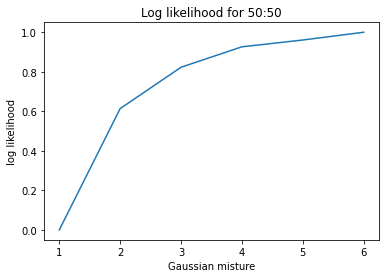

In [ ]:
train_dataset3,test_dataset3 = p5_split_dataset(P5dataset,0.5)
classes = 10
y3 = np.zeros(6)
x3 = np.array([1,2,3,4,5,6])
for number_of_Gaussian in x3:
  Means3,Variance3,Pi3 = p5_GMM_training(train_dataset3,5,number_of_Gaussian)
  accuracy3,confusion_matrix3 = p5_GMM_testing(test_dataset3,10,Means3,Variance3,Pi3,number_of_Gaussian)
  TP3=[]
  TN3=[]
  FP3=[]
  FN3=[]
  F13=[]
  for i in range(classes):
    TP3.append(confusion_matrix3[i][i])
    TN3.append(np.sum(confusion_matrix3)-np.sum(confusion_matrix3[i,:])-np.sum(confusion_matrix3[:,i])+confusion_matrix3[i][i])
    FP3.append(np.sum(confusion_matrix3[i,:])-confusion_matrix3[i][i])
    FN3.append(np.sum(confusion_matrix3[:,i])-confusion_matrix3[i][i])
    F13.append((2*TP3[i])/(2*TP3[i] + FP3[i] + FN3[i]))
  y3[number_of_Gaussian-1] = p5_get_likelihood(train_dataset3,Means3,Variance3,Pi3,number_of_Gaussian)
  print("Accuracy for ",number_of_Gaussian," mixtures is : ",accuracy3)
  print("F1 scores ",number_of_Gaussian," mixtures is : ",F13)
  print("Confusion matrix for ",number_of_Gaussian," mixtures is : ",confusion_matrix3)

y3 = (y3-np.min(y3))/(np.max(y3)-np.min(y3))
plt.plot(x3,y3) 
plt.title("Log likelihood for 50:50") 
plt.ylabel("log likelihood") 
plt.xlabel("Gaussian misture") 
plt.show()

## Model 4 - 70:30

In [222]:
count = 42000

In [223]:
X_train = dataset[0:count,1:]

In [224]:
Y_train =dataset[0:count,0]

In [225]:
X_test = dataset[count:,1:]

In [226]:
Y_test = dataset[count:,0]

In [227]:
X_test.shape

(18000, 10)

### (i) Bayes Classifier

In [ ]:
classes = 10

In [ ]:
# creating training datas for different class
temp = dataset[0:count,:]
lst = []
for i in range(classes):
  x = temp[np.where(temp[:,0]==i)]
  x = x[:,1:]
  lst.append(x)

In [ ]:
mean=[]   # 10 features' mean for each classes
for i in range(classes):
  a=lst[i]
  a = a.mean(axis=0)
  mean.append(a)

#### Training

In [ ]:
count = 0
for i in range(X_train.shape[0]):
  g = []  #class conditionals
  for j in range(classes):
    v = (X_train[i]-mean[j])
    v = np.power(v,2)
    k = 0.5 * np.sum(v)
    k = math.exp(-k)
    g.append(k)
  k = g.index(max(g))
  if k==int(Y_train[i]):
    count=count+1

In [ ]:
print('Train accuracy is:')
print(count*100/X_train.shape[0])

Train accuracy is:
82.24047619047619


#### Testing

In [ ]:
conf_matrix = np.zeros((classes,classes))
count = 0
for i in range(X_test.shape[0]):
  g = []  #class conditionals
  for j in range(classes):
    v = (X_test[i]-mean[j])
    v = np.power(v,2)
    k = 0.5 * np.sum(v)
    k = math.exp(-k)
    g.append(k)
  k = g.index(max(g))
  if k==int(Y_test[i]):
    count=count+1
  v = int(Y_test[i])
  conf_matrix[v][k] += 1

In [ ]:
print('Test accuracy is:')
print(count*100/X_test.shape[0])

Test accuracy is:
85.76666666666667


In [ ]:
print('The confusion matrix for above testing data is:')
print(conf_matrix.astype(int))

The confusion matrix for above testing data is:
[[1556  120    1   33    7    0    5   14   57    7]
 [  61 1585    0  105   19    2    1    0   22    5]
 [  42   10 1450   45    6  233    1    9    3    1]
 [   6    0    0 1628   22   29   17   98    0    0]
 [   0    0    0   14 1754   29    0    1    0    2]
 [   0   11   35   58   46 1631    7    8    2    2]
 [   0    0    0    7    2    7 1597  187    0    0]
 [   0    1   10   64   19   10  722  974    0    0]
 [  77    3    0    1   11    9    1    1 1672   25]
 [  15   15    0    8   54    0    2   29   86 1591]]


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [ ]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.8748945740792803, 0.8942172073342737, 0.8798543689320388, 0.865267074142971, 0.9379679144385027, 0.8698666666666667, 0.7690825908981459, 0.6241589234219801, 0.9181768259198243, 0.9268861054471308]


### (ii) Logistic regression

In [228]:
tmp = np.ones((X_train.shape[0],1))  # Creating augmented data
X_train=np.column_stack((X_train,tmp))
X_train.shape

(42000, 11)

In [229]:
tmp = np.ones((X_test.shape[0],1))  # Creating augmented data
X_test=np.column_stack((X_test,tmp))
X_test.shape

(18000, 11)

#### Training

In [230]:
classes = 10

In [231]:
W=[]
for i in range(10):
  W.append(np.ones((11,1))/11)

In [232]:
def calc_loss(X,W,j):
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for i in range(classes):
    e.append(math.exp(W[i].T@X))
  k = sum(e)
  for i in range(classes):
    g.append(e[i]/k)
  loss = -1*math.log(g[j])     # loss for 1 image
  for i in range(classes):
    if i!=j:
      grad.append(-g[i]*X.reshape(X.shape[0]))
    else:
      grad.append((1-g[i])*X.reshape(X.shape[0]))
  return loss,grad

In [233]:
def train_epoch1():
  final_loss = 0
  final_grad = np.zeros((11,classes))
  for i in range(X_train.shape[0]):
    loss,grad = calc_loss(X_train[i,:],W,int(Y_train[i]))
    final_loss =final_loss + loss
    final_grad = final_grad + np.stack(grad,axis = 1)
  return final_loss,final_grad

In [234]:
epochs = 100
alpha = 10
prev_loss = 0
for i in range(epochs):
  loss,grad = train_epoch1()
  for j in range(classes):
    gradient = grad[:,j].reshape(grad[:,j].shape[0],1)
    if prev_loss<loss:
      alpha = (alpha/10)
    W[j]=W[j]+alpha*gradient/np.linalg.norm(gradient)
    prev_loss = loss
  print('loss in',i,'epoch is',loss/X_train.shape[0])

loss in 0 epoch is 2.3025850929949803
loss in 1 epoch is 2.1162325306670478
loss in 2 epoch is 2.3714373443176093
loss in 3 epoch is 2.253144093084993
loss in 4 epoch is 2.1452755460959283
loss in 5 epoch is 2.0504750338270683
loss in 6 epoch is 1.9715954620023344
loss in 7 epoch is 1.9109695050310942
loss in 8 epoch is 1.86876141111278
loss in 9 epoch is 1.8395880829150757
loss in 10 epoch is 1.8149293019153623
loss in 11 epoch is 1.7905914473680802
loss in 12 epoch is 1.766519048847081
loss in 13 epoch is 1.7427170420025033
loss in 14 epoch is 1.7191881617829037
loss in 15 epoch is 1.6959348994541772
loss in 16 epoch is 1.6729596188566402
loss in 17 epoch is 1.6502645581141626
loss in 18 epoch is 1.6278518221792457
loss in 19 epoch is 1.6057233756453695
loss in 20 epoch is 1.583881035194436
loss in 21 epoch is 1.5623264628364233
loss in 22 epoch is 1.5410611593603898
loss in 23 epoch is 1.5200864584565519
loss in 24 epoch is 1.4994035213012988
loss in 25 epoch is 1.4790133318081362
l

In [235]:
print('Empirical risk on train data is:')
print(loss/X_train.shape[0])

Empirical risk on train data is:
0.6951398970568252


#### Testing

In [236]:
conf_matrix = np.zeros((classes,classes))
loss = 0
count = 0
for i in range(X_test.shape[0]):
  X = X_test[i,:]
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for j in range(classes):
    e.append(math.exp(W[j].T@X))
  k = sum(e)
  for j in range(classes):
    g.append(e[j]/k)
  k = g.index(max(g))
  if k==Y_test[i]:
    count = count+1
  v = int(Y_test[i])
  conf_matrix[v][k] += 1

  loss = loss - 1*math.log(g[v])

In [237]:
print('Test accuracy is:')
print(count*100/X_test.shape[0])

Test accuracy is:
87.25555555555556


In [238]:
print('Empirical risk on test data is:')
print(loss/X_test.shape[0])

Empirical risk on test data is:
0.5863406604119673


In [239]:
print('The confusion matrix for above testing data is:')
print(conf_matrix.astype(int))

The confusion matrix for above testing data is:
[[1636   73    1   17    0    0    4   15   45    9]
 [  80 1600    2   72   16    3    0    0   19    8]
 [  51   10 1530   30    4  154    5   15    0    1]
 [   6    0    1 1642   23   46   14   65    0    3]
 [   0    0    0   17 1739   40    0    0    2    2]
 [   0    9   41   40   29 1655   13    3    3    7]
 [   0    0   19    3    2   18 1610  143    5    0]
 [   1    0   73   73   16   15  649  973    0    0]
 [  58    2    1    0    5    7    0    1 1695   31]
 [  20    7    1    4   36    0    4   26   76 1626]]


In [240]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [241]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.895947426067908, 0.9140245644101685, 0.88209858748919, 0.8880475932936722, 0.9476839237057221, 0.8855002675227395, 0.7855574530373262, 0.6399210785925682, 0.9300411522633745, 0.9326068253513048]


### (iii) GMM

Accuracy for  1  mixtures is :  0.9393333333333334
F1 scores  1  mixtures is :  [0.9313063063063063, 0.9571505088377076, 0.9815022421524664, 0.9242298084929226, 0.9455155071248952, 0.9542556140837261, 0.9108262885192255, 0.8812392426850258, 0.9498607242339833, 0.9557277255118982]
Confusion matrix for  1  mixtures is :  [[1654.   26.   32.   17.    1.    0.    1.    2.   29.    9.]
 [  74. 1787.    1.    3.    1.    1.    1.    8.    8.    2.]
 [   0.    4. 1751.    6.    0.    5.    4.    1.    2.    0.]
 [  21.    7.    2. 1665.   17.   20.   12.   50.   17.   13.]
 [   0.    4.    0.   18. 1692.   31.    1.    7.    6.   22.]
 [   1.    2.    3.   21.   46. 1721.    4.    8.   13.    0.]
 [   0.    0.    0.    8.    1.    0. 1670.  186.    1.   21.]
 [   3.    2.    1.   30.    4.    0.   82. 1536.    5.   17.]
 [  24.   11.    5.   10.   12.    6.    1.    2. 1705.   20.]
 [   4.    5.    0.    1.   24.    4.    4.    6.    8. 1727.]]
Accuracy for  2  mixtures is :  0.94533333333333

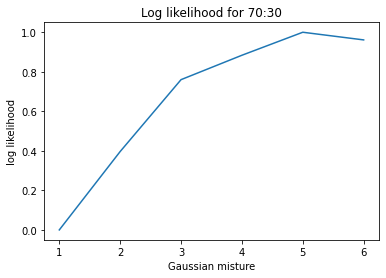

In [ ]:
train_dataset4,test_dataset4 = p5_split_dataset(P5dataset,0.7)
classes = 10
y4 = np.zeros(6)
x4 = np.array([1,2,3,4,5,6])
for number_of_Gaussian in x4:
  Means4,Variance4,Pi4 = p5_GMM_training(train_dataset4,5,number_of_Gaussian)
  accuracy4,confusion_matrix4 = p5_GMM_testing(test_dataset4,10,Means4,Variance4,Pi4,number_of_Gaussian)
  TP4=[]
  TN4=[]
  FP4=[]
  FN4=[]
  F14=[]
  for i in range(classes):
    TP4.append(confusion_matrix4[i][i])
    TN4.append(np.sum(confusion_matrix4)-np.sum(confusion_matrix4[i,:])-np.sum(confusion_matrix4[:,i])+confusion_matrix4[i][i])
    FP4.append(np.sum(confusion_matrix4[i,:])-confusion_matrix4[i][i])
    FN4.append(np.sum(confusion_matrix4[:,i])-confusion_matrix4[i][i])
    F14.append((2*TP4[i])/(2*TP4[i] + FP4[i] + FN4[i]))
  y4[number_of_Gaussian-1] = p5_get_likelihood(train_dataset4,Means4,Variance4,Pi4,number_of_Gaussian)
  print("Accuracy for ",number_of_Gaussian," mixtures is : ",accuracy4)
  print("F1 scores ",number_of_Gaussian," mixtures is : ",F14)
  print("Confusion matrix for ",number_of_Gaussian," mixtures is : ",confusion_matrix4)

y4 = (y4-np.min(y4))/(np.max(y4)-np.min(y4))
plt.plot(x4,y4) 
plt.title("Log likelihood for 70:30") 
plt.ylabel("log likelihood") 
plt.xlabel("Gaussian misture") 
plt.show()

## Model 5 - 90:10

In [242]:
count = 54000

In [243]:
X_train = dataset[0:count,1:]

In [244]:
Y_train =dataset[0:count,0]

In [245]:
X_test = dataset[count:,1:]

In [246]:

Y_test = dataset[count:,0]

In [247]:
X_test.shape

(6000, 10)

### (i) Bayes Classifier

In [ ]:
classes = 10

In [ ]:
# creating training datas for different class
temp = dataset[0:count,:]
lst = []
for i in range(classes):
  x = temp[np.where(temp[:,0]==i)]
  x = x[:,1:]
  lst.append(x)

In [ ]:
mean=[]   # 10 features' mean for each classes
for i in range(classes):
  a=lst[i]
  a = a.mean(axis=0)
  mean.append(a)

#### Training

In [ ]:
count = 0
for i in range(X_train.shape[0]):
  g = []  #class conditionals
  for j in range(classes):
    v = (X_train[i]-mean[j])
    v = np.power(v,2)
    k = 0.5 * np.sum(v)
    k = math.exp(-k)
    g.append(k)
  k = g.index(max(g))
  if k==int(Y_train[i]):
    count=count+1

In [ ]:
print('Train accuracy is:')
print(count*100/X_train.shape[0])

Train accuracy is:
82.9888888888889


#### Testing

In [ ]:
conf_matrix = np.zeros((classes,classes))
count = 0
for i in range(X_test.shape[0]):
  g = []  #class conditionals
  for j in range(classes):
    v = (X_test[i]-mean[j])
    v = np.power(v,2)
    k = 0.5 * np.sum(v)
    k = math.exp(-k)
    g.append(k)
  k = g.index(max(g))
  if k==int(Y_test[i]):
    count=count+1
  v = int(Y_test[i])
  conf_matrix[v][k] += 1

In [ ]:
print('Test accuracy is:')
print(count*100/X_test.shape[0])

Test accuracy is:
86.46666666666667


In [ ]:
print('The confusion matrix for above testing data is:')
print(conf_matrix.astype(int))

The confusion matrix for above testing data is:
[[556  21   0  16   0   0   0   0   6   1]
 [ 14 494   0  66  15   0   0   0   9   2]
 [ 33   9 483  20   4  42   0   5   3   1]
 [  2   0   0 554  16   5   1  22   0   0]
 [  0   0   0   3 592   4   0   1   0   0]
 [  0  12  33  12  13 524   3   2   0   1]
 [  0   0   0   1   0   2 540  57   0   0]
 [  0   0   4  12   2   0 221 361   0   0]
 [ 35   1   0   0   2   3   0   1 550   8]
 [  7   1   0   4  23   0   1   8  22 534]]


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [ ]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.8917401764234162, 0.8681898066783831, 0.8625, 0.860248447204969, 0.9344909234411997, 0.888135593220339, 0.7906295754026355, 0.6830652790917692, 0.9243697478991597, 0.9311246730601569]


### (ii) Logistic regression

In [248]:
tmp = np.ones((X_train.shape[0],1))  # Creating augmented data
X_train=np.column_stack((X_train,tmp))
X_train.shape

(54000, 11)

In [249]:
tmp = np.ones((X_test.shape[0],1))  # Creating augmented data
X_test=np.column_stack((X_test,tmp))
X_test.shape

(6000, 11)

#### Training

In [250]:
classes = 10

In [251]:
W=[]
for i in range(10):
  W.append(np.ones((11,1))/11)

In [252]:
def calc_loss(X,W,j):
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for i in range(classes):
    e.append(math.exp(W[i].T@X))
  k = sum(e)
  for i in range(classes):
    g.append(e[i]/k)
  loss = -1*math.log(g[j])     # loss for 1 image
  for i in range(classes):
    if i!=j:
      grad.append(-g[i]*X.reshape(X.shape[0]))
    else:
      grad.append((1-g[i])*X.reshape(X.shape[0]))
  return loss,grad

In [253]:
def train_epoch1():
  final_loss = 0
  final_grad = np.zeros((11,classes))
  for i in range(X_train.shape[0]):
    loss,grad = calc_loss(X_train[i,:],W,int(Y_train[i]))
    final_loss =final_loss + loss
    final_grad = final_grad + np.stack(grad,axis = 1)
  return final_loss,final_grad

In [254]:
epochs = 100
alpha = 10
prev_loss = 0
for i in range(epochs):
  loss,grad = train_epoch1()
  for j in range(classes):
    gradient = grad[:,j].reshape(grad[:,j].shape[0],1)
    if prev_loss<loss:
      alpha = (alpha/10)
    W[j]=W[j]+alpha*gradient/np.linalg.norm(gradient)
    prev_loss = loss
  print('loss in',i,'epoch is',loss/X_train.shape[0])

loss in 0 epoch is 2.3025850929958565
loss in 1 epoch is 2.108518530824101
loss in 2 epoch is 2.352762533611664
loss in 3 epoch is 2.235000675404945
loss in 4 epoch is 2.1278035235401096
loss in 5 epoch is 2.0337815488745123
loss in 6 epoch is 1.9557272619289174
loss in 7 epoch is 1.8958207054542053
loss in 8 epoch is 1.8537970124619976
loss in 9 epoch is 1.8240904038608008
loss in 10 epoch is 1.7989122041313743
loss in 11 epoch is 1.774074655746
loss in 12 epoch is 1.7495135332779301
loss in 13 epoch is 1.7252335174669955
loss in 14 epoch is 1.7012374713511316
loss in 15 epoch is 1.6775280282275251
loss in 16 epoch is 1.654107684352965
loss in 17 epoch is 1.6309787970402403
loss in 18 epoch is 1.608143576805768
loss in 19 epoch is 1.5856040793005033
loss in 20 epoch is 1.5633621974472451
loss in 21 epoch is 1.5414196541351872
loss in 22 epoch is 1.5197779953761301
loss in 23 epoch is 1.4984385840769063
loss in 24 epoch is 1.477402594418535
loss in 25 epoch is 1.456671006920144
loss in

In [255]:
print('Empirical risk on train data is:')
print(loss/X_train.shape[0])

Empirical risk on train data is:
0.6611797845553683


#### Testing

In [256]:
conf_matrix = np.zeros((classes,classes))
count = 0
loss = 0
for i in range(X_test.shape[0]):
  X = X_test[i,:]
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for j in range(classes):
    e.append(math.exp(W[j].T@X))
  k = sum(e)
  for j in range(classes):
    g.append(e[j]/k)
  k = g.index(max(g))
  if k==Y_test[i]:
    count = count+1
  v = int(Y_test[i])
  conf_matrix[v][k] += 1

  loss = loss - 1*math.log(g[v])

In [257]:
print('Test accuracy is:')
print(count*100/X_test.shape[0])

Test accuracy is:
88.11666666666666


In [258]:
print('Empirical risk on test data is:')
print(loss/X_test.shape[0])

Empirical risk on test data is:
0.5694684897961244


In [259]:
print('The confusion matrix for above testing data is:')
print(conf_matrix.astype(int))

The confusion matrix for above testing data is:
[[581   9   0   7   0   0   0   0   3   0]
 [ 19 512   0  45  12   0   0   0   6   6]
 [ 42   9 501  27   1  10   1   8   0   1]
 [  3   0   1 548  18   6   0  22   0   2]
 [  0   0   0   4 591   5   0   0   0   0]
 [  0   3  47  10   9 522   5   1   1   2]
 [  0   0   5   0   0   4 548  42   1   0]
 [  1   0  21  16   1   1 188 372   0   0]
 [ 20   0   1   0   2   6   0   1 563   7]
 [ 11   0   1   1  15   0   1   6  16 549]]


In [260]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [261]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.9099451840250588, 0.9037952338923213, 0.8513169073916738, 0.8712241653418124, 0.9463570856685348, 0.9046793760831889, 0.8160833953834699, 0.7072243346007605, 0.946218487394958, 0.9408740359897172]


### (iii) GMM

Accuracy for  1  mixtures is :  0.9388333333333333
F1 scores  1  mixtures is :  [0.9320066334991708, 0.9571788413098237, 0.9839119390347163, 0.9253012048192771, 0.937394247038917, 0.9488448844884488, 0.920265780730897, 0.8843881856540085, 0.9464740866610025, 0.9531635168447001]
Confusion matrix for  1  mixtures is :  [[562.  10.  15.   9.   0.   0.   0.   0.   4.   2.]
 [ 19. 570.   0.   0.   0.   0.   0.   1.   3.   1.]
 [  0.   1. 581.   0.   0.   0.   0.   2.   1.   0.]
 [  6.   4.   0. 576.   2.   7.   2.  16.   7.   4.]
 [  0.   0.   0.  11. 554.  14.   1.   3.   3.   7.]
 [  1.   1.   0.   7.  20. 575.   1.   3.   2.   0.]
 [  1.   0.   0.   2.   0.   1. 554.  46.   0.   7.]
 [  1.   2.   0.  14.   2.   1.  35. 524.   1.   7.]
 [ 11.   6.   0.   2.   6.   3.   0.   0. 557.  12.]
 [  3.   3.   0.   0.   5.   1.   0.   3.   2. 580.]]
Accuracy for  2  mixtures is :  0.9473333333333334
F1 scores  2  mixtures is :  [0.9451827242524917, 0.96, 0.9907640638119227, 0.9361358124494745, 0.9

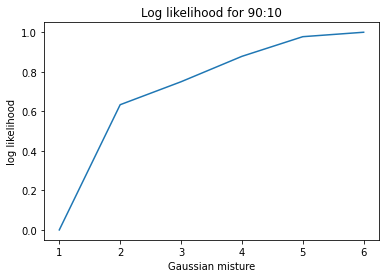

In [ ]:
train_dataset5,test_dataset5 = p5_split_dataset(P5dataset,0.9)
y5 = np.zeros(6)
x5 = np.array([1,2,3,4,5,6])
for number_of_Gaussian in x5:
  Means5,Variance5,Pi5 = p5_GMM_training(train_dataset5,5,number_of_Gaussian)
  accuracy5,confusion_matrix5 = p5_GMM_testing(test_dataset5,10,Means5,Variance5,Pi5,number_of_Gaussian)
  TP5=[]
  TN5=[]
  FP5=[]
  FN5=[]
  F15=[]
  for i in range(classes):
    TP5.append(confusion_matrix5[i][i])
    TN5.append(np.sum(confusion_matrix5)-np.sum(confusion_matrix5[i,:])-np.sum(confusion_matrix5[:,i])+confusion_matrix5[i][i])
    FP5.append(np.sum(confusion_matrix5[i,:])-confusion_matrix5[i][i])
    FN5.append(np.sum(confusion_matrix5[:,i])-confusion_matrix5[i][i])
    F15.append((2*TP5[i])/(2*TP5[i] + FP5[i] + FN5[i]))
  y5[number_of_Gaussian-1] = p5_get_likelihood(train_dataset5,Means5,Variance5,Pi5,number_of_Gaussian)
  print("Accuracy for ",number_of_Gaussian," mixtures is : ",accuracy5)
  print("F1 scores ",number_of_Gaussian," mixtures is : ",F15)
  print("Confusion matrix for ",number_of_Gaussian," mixtures is : ",confusion_matrix5)

y5 = (y5-np.min(y5))/(np.max(y5)-np.min(y5))
plt.plot(x5,y5) 
plt.title("Log likelihood for 90:10") 
plt.ylabel("log likelihood") 
plt.xlabel("Gaussian misture") 
plt.show()

## Likelihood curve for EM for various models

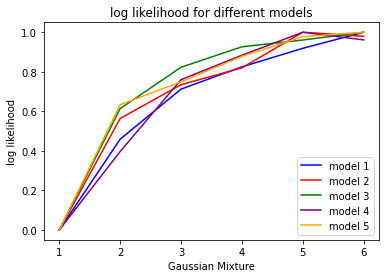

In [ ]:
fig, ax = plt.subplots()
x=x1
# Plot each dataset in its own subplot
ax.plot(x, y1, color='blue',label = 'model 1')
ax.plot(x, y2, color='red',label = 'model 2')
ax.plot(x, y3, color='green',label = 'model 3')
ax.plot(x, y4, color='purple',label = 'model 4')
ax.plot(x, y5, color='orange',label = 'model 5')

ax.set_xlabel('Gaussian Mixture')
ax.set_ylabel('log likelihood')
ax.set_title('log likelihood for different models')
ax.legend()
plt.show()

## ROC curve for different models

In [525]:
def ROC_curve(count):
  classes = 2
  # creating training datas for different class
  temp = dataset[0:count,:]
  lst = []
  ans = []
  for i in range(classes):
    x1 = temp[np.where(temp[:,0]==i)]
    x = x1[:,1:]
    y = x1[:,0]
    y=y.reshape((y.shape[0],1))
    lst.append(x)
    ans.append(y)
  l = np.row_stack((lst[0],lst[1]))
  m = np.row_stack((ans[0],ans[1]))
  mean=[]   # 10 features' mean for each classes
  for i in range(classes):
    a=lst[i]
    a = a.mean(axis=0)
    mean.append(a)
  TPR=[]
  FPR=[]
  for j in range(10):
    count = 0
    threshold=(j-5)/100
    TP=0
    FP=0
    TN=0
    FN=0
    for i in range(l.shape[0]):
      v = (l[i]-mean[0])
      v = np.power(v,2)
      k = 0.5 * np.sum(v)
      k1 = math.exp(-k)
      v = (l[i]-mean[1])
      v = np.power(v,2)
      k = 0.5 * np.sum(v)
      k2 = math.exp(-k)
      if k1-k2>threshold:
        k=1
      else:
        k=0
      if k==int(m[i][0]) and k==1:
        TP+=1
      elif k==int(m[i][0]) and k==0:
        TN+=1
      elif k!=int(m[i][0]) and k==1:
        FP+=1
      else:
        FN+=1
      # print(TP)
      # print(TN)
      # print(FP)
      # print(FN)
    TPR.append(TP/(TP+FN))
    FPR.append(FP/(FP+TN))
  #plt.plot(TPR,FPR)
  return TPR,FPR

In [526]:
x1,y1 = ROC_curve(12000) # model 1 20:80

In [528]:
x2,y2=ROC_curve(18000) # model 1 30:70

In [529]:
x3,y3=ROC_curve(30000) # model 1 50:50

In [530]:
x4,y4=ROC_curve(42000) # model 1 70:30

In [531]:
x5,y5=ROC_curve(54000) # model 1 90:10

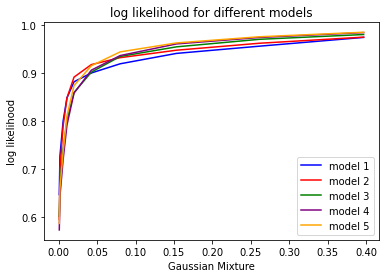

In [532]:
fig, ax = plt.subplots()
# Plot each dataset in its own subplot
ax.plot(x1, y1, color='blue',label = 'model 1')
ax.plot(x1, y2, color='red',label = 'model 2')
ax.plot(x1, y3, color='green',label = 'model 3')
ax.plot(x1, y4, color='purple',label = 'model 4')
ax.plot(x1, y5, color='orange',label = 'model 5')

ax.set_xlabel('Gaussian Mixture')
ax.set_ylabel('log likelihood')
ax.set_title('log likelihood for different models')
ax.legend()
plt.show()